In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

age         job  marital  education default  balance housing loan  \
3333    42  management  married   tertiary      no        9     yes   no   
8544    34  management   single   tertiary      no      340     yes   no   
39344   27  technician   single  secondary      no      292     yes   no   
22294   36  technician   single  secondary      no        0      no   no   
42484   40  management   single   tertiary      no     3797      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  
3333     unknown   15   may        98         3     -1         0  unknown  no  
8544     unknown    3   jun       633        28     -1         0  unknown  no  
39344  telephone   18   may        45         4     -1         0  unknown  no  
22294   cellular   21   aug        42         1     -1         0  unknown  no  
42484   cellular   14   dec       263         1    195         2  failure  no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
cats = df.select_dtypes(include = ['object']).columns
nums = df.select_dtypes(include = ['int64', 'float64']).columns
df_mode = pd.DataFrame({'mode' : [df[i].mode()[0] for i in nums]}).transpose()
df_mode.columns = df.describe().columns
pd.concat([df.describe(), df_mode])

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   
mode      32.000000       0.000000     20.000000    124.000000      1.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000  
mode      -1.000000      0.000000

- Kolom numerik age, day, campaign dan previous memiliki nilai rata-rata yang tidak jauh berbeda dengan median, sedangkan kolom balance, duration dan pdays memiliki nilai yang cukup berbeda antara kedua value tersebut
- Hampir seluruh kolom numerik memiliki outlier kecuali kolom day yang memiliki rentang statis antara 1-31 yang menunjukkan rentang tanggal dalam bulan
- Distribusi untuk kolom numerik hampir sebagian besar right-skewed sehingga perlu dilakukan feature transformation untuk mengubah distribusi menjadi mendekati normal, kecuali pada kolom day memiliki distribusi multi modal
- Tidak ditemukan null values maupun duplicates pada seluruh kolom
- Terdapat value negatif pada kolom balance sepertinya perlu dilakukan penanganan pada tahap berikutnya
- Terdapat value 0 pada kolom duration dimana nilai yang mungkin untuk mengisi kolom tersebut seharusnya lebih dari 0 sehingga perlu dilakukan drop untuk row yang memiliki value tersebut apabila kontribusi terhadap dataset tidak terlalu banyak

## Unvariate Analysis

Analisis setiap kolom secara terpisah, melihat distribusi nilainya secara detail. Disini kami menggunakan distplot, violinplot dan boxplot untuk distribusi data numerik dan countplot untuk distribusi data kategorikal di setiap value kolomnya

Text(0.5, 1.02, 'Distribusi Data Numerikal dengan Distplot')

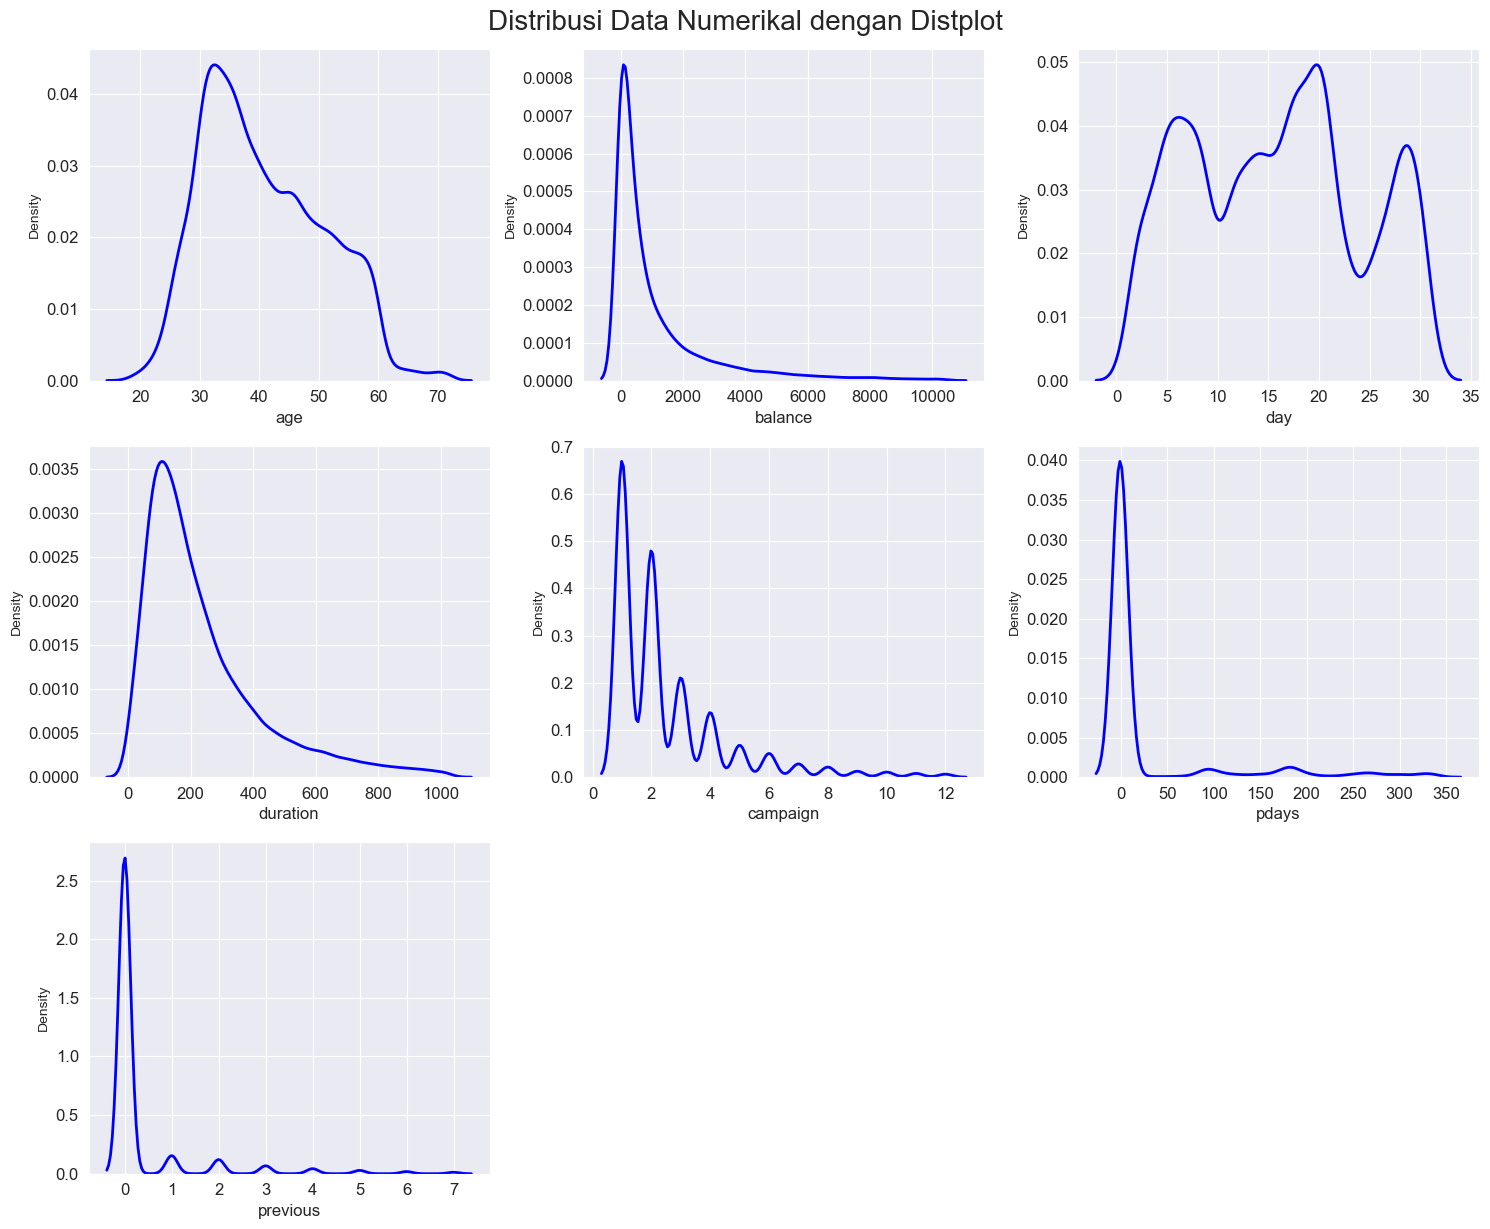

In [33]:
import math

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 12))
for i in range(len(nums)):
    sns.kdeplot(df[nums[i]], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), color = 'blue', linewidth = 2)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel = nums[i], fontsize=12)
    plt.tight_layout()
plt.suptitle("Distribusi Data Numerikal dengan Distplot", fontsize=20, y=1.02)

Text(0.5, 1.02, 'Distribusi Data Numerikal dengan Boxplot')

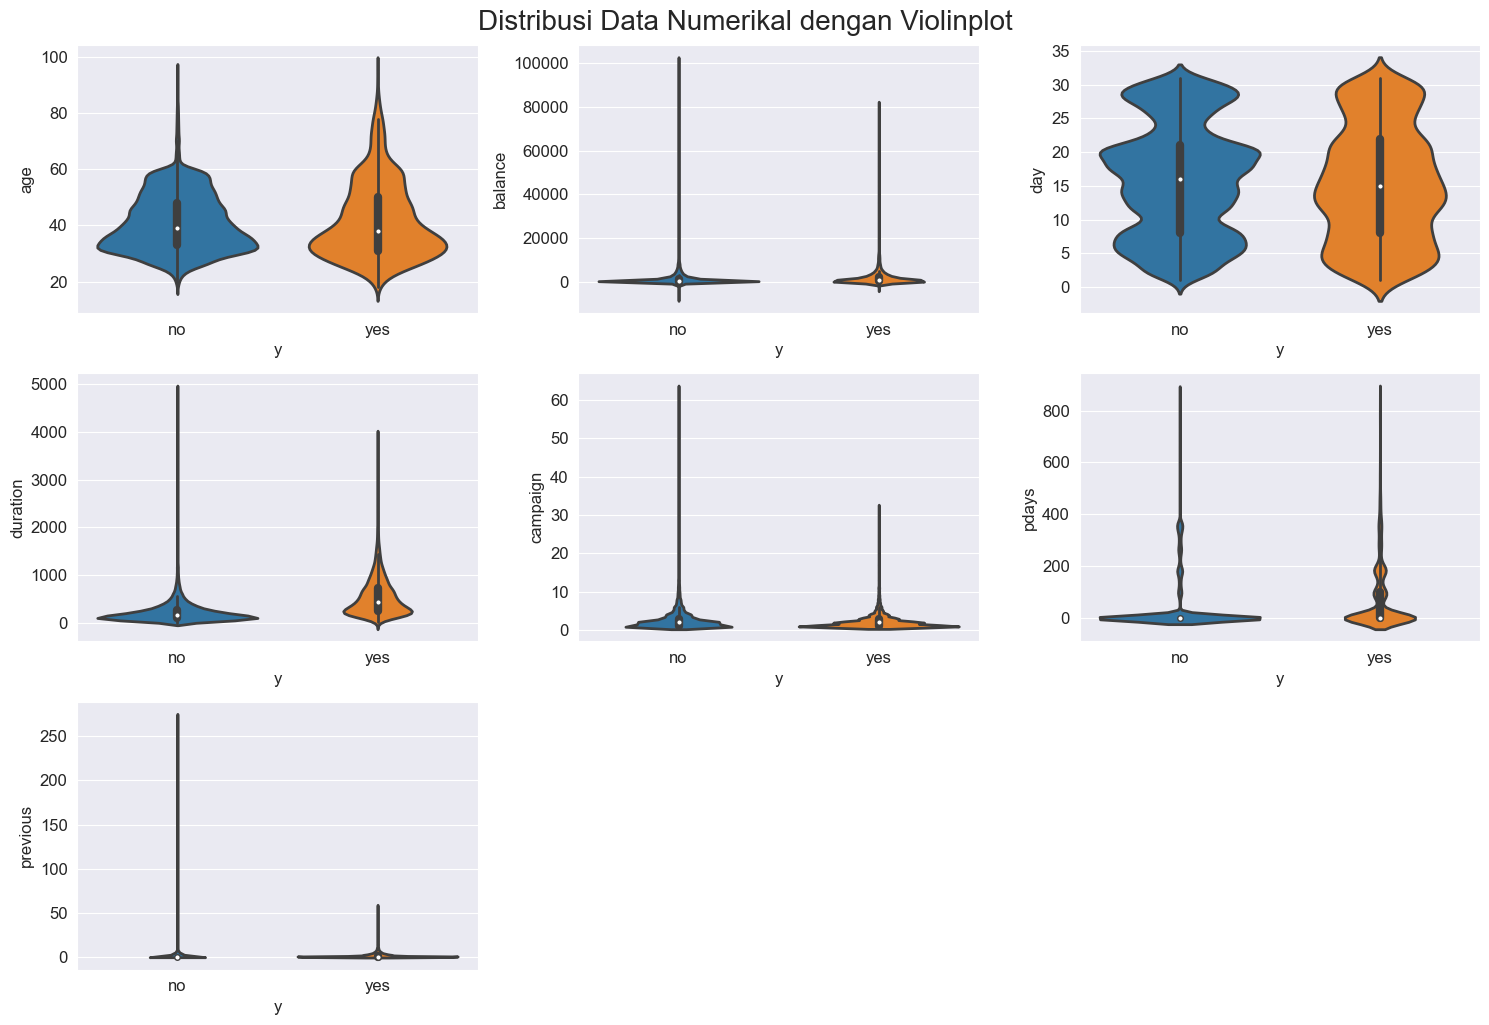

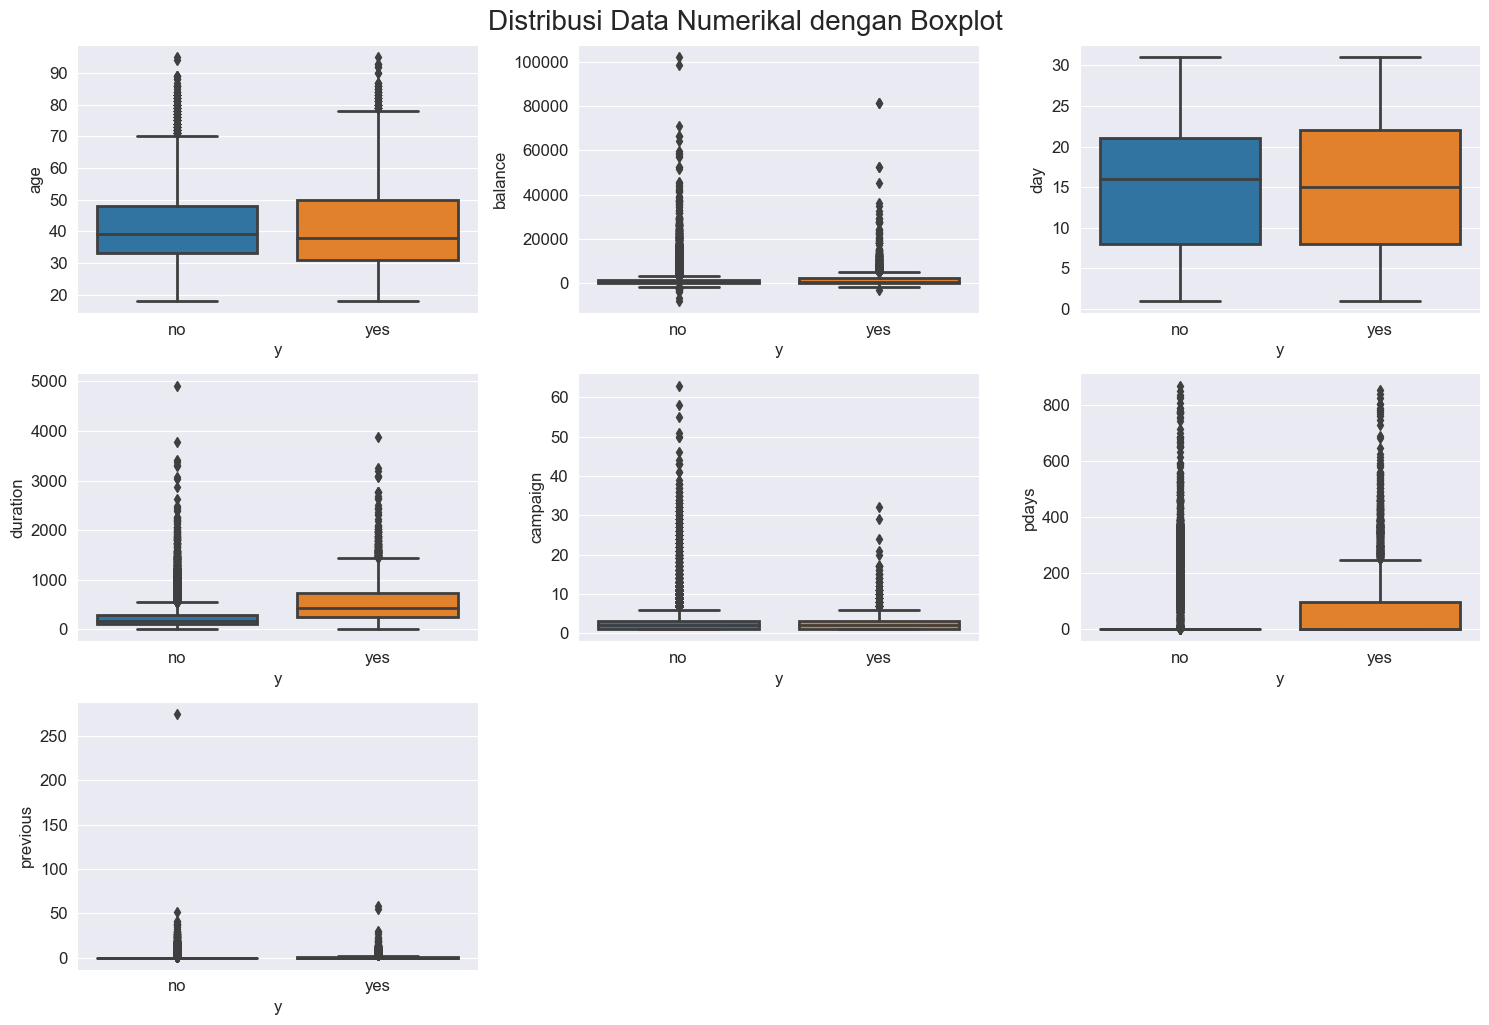

In [11]:
fig = plt.figure(figsize=(15, 10))
for i in range(len(nums)):
    sns.violinplot(y = df[nums[i]], x = df['y'], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), linewidth = 2)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel = nums[i], fontsize=12)
    plt.xlabel(xlabel = 'y', fontsize=12)
    plt.tight_layout()
plt.suptitle("Distribusi Data Numerikal dengan Violinplot", fontsize=20, y=1.02)

fig = plt.figure(figsize=(15, 10))
for i in range(len(nums)):
    sns.boxplot(y = df[nums[i]], x = df['y'], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), linewidth = 2)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel = nums[i], fontsize=12)
    plt.xlabel(xlabel = 'y', fontsize=12)
    plt.tight_layout()
plt.suptitle("Distribusi Data Numerikal dengan Boxplot", fontsize=20, y=1.02)

Univariate (Numerik):
- kolom `age`: Rata-rata sekitar 40,94, Median adalah 39, sehingga data kemungkinan cenderung memiliki ekor panjang ke kanan (positively skewed). Customer tertua berumur 95 tahun termuda berumur 18 tahun, paling banyak customer berumur 32 tahun. Dengan rata-rata yang sedikit lebih tinggi dari median. Rentang usia berkisar antara 18 hingga 95. Kolom `age` memiliki outlier . **Untuk menangani outliers ketika data pre processing bisa dipertimbangkan dengan standardization transformasi**. <br>
- kolom `balance`:Rata-rata sekitar 1362,27, Median  adalah 448, yang jauh lebih rendah dari rata-rata. Hal ini menunjukkan bahwa data mungkin memiliki ekor panjang ke kanan (positively skewed) dengan beberapa nilai ekstrem yang lebih rendah. Paling banyak customer tidak memiliki balance sama sekali atau bernilai 0. Rentang saldo berkisar dari nilai negatif hingga lebih dari 100 ribu euro. Kolom `balance` memiliki Outlier.  **Untuk menangani outliers ketika data pre processing bisa dipertimbangkan dengan standardization transformasi. Dan dikarenakan saldo balance dengan angka minus itu agak kurang make sense maka angka-angka yang minus pada saldo `balance` direplace dengan nilai 0** <br>
- kolom `day`: Rata-rata sekitar 15,81, Median adalah 16, sehingga distribusi data mungkin mendekati distribusi yang simetris. Rentang nilai hari berkisar dari 1 hingga 31. Tanggal paling awal customer menerima contact pada campaign saat ini adalah pada tanggal 1 sedangkan tanggal paling akhir adalah tanggal 31. Kebanyakan customer menerima contact pada campaign kali ini adalah pada tanggal 20, memiliki distribusi multi modal sehingga kolom `day` tidak memiliki outlier.  <br>
- kolom `duration`: Rata-rata sekitar 258,16, Median adalah 180, sehingga data kemungkinan memiliki ekor panjang ke kanan (positively skewed). Dengan rata-rata yang lebih besar dari median, ini menunjukkan adanya nilai outlier. Rentang durasi berkisar dari 0 hingga 4918 detik. Durasi tersingkat adalah 0 detik sebanyak 3 customer (sepertinya customer belum sempat pick up the telephone call) sedangkan terlama adalah 4918 detik. Kebanyakan tersambung selama 124 detik. **Untuk menangani outliers ketika data pre processing bisa dipertimbangkan dengan standardization transformasi** <br>
- kolom `campaign`: Rata-rata sekitar 2,76. Median adalah 2, sehingga distribusi data mungkin mendekati distribusi yang simetris. Rentang nilai campaign berkisar dari 1 hingga 63. Kolom `campaign` memiliki outlier. Paling banyak customer menerima contact sebanyak 63 kali pada campaign saat ini sedangkan paling sedikit hanya sakali. Mayoritas customer menerima sekali contact saja. **Untuk menangani outliers ketika data pre processing bisa dipertimbangkan dengan standardization transformasi**. <br>
- kolom `pdays`: Rata-rata  sekitar 40,20, Median adalah -1, yang menunjukkan mayoritas nasabah tidak dihubungi dalam campaign sebelumnya (data berkumpul pada nilai -1). Distribusi ini mungkin memiliki ekor panjang ke kanan (positively skewed) karena adanya nilai positif yang lebih tinggi. Rentang nilai pdays berkisar dari -1 hingga 871. Waktu terjauh yang terlewat semenjak customer terakhir kali menerima contact pada campaign sebelum ini adalah 871 hari yang lalu sedangkan terdekat bernilai -1 yaitu customer belum pernah menerima contact sama sekali pada campaign sebelum ini. Mayoritas customer belum menerima contact pada campaign sebelum ini. Kolom `pdays` memiliki nilai outlier. **Untuk menangani outliers ketika data pre processing bisa dipertimbangkan dengan standardization transformasi**. <br>
- kolom `previous`: Rata-rata sekitar 0,58, Median adalah 0, sehingga distribusi data mungkin mendekati distribusi yang simetris.Rentang nilai previous berkisar dari 0 hingga 275, yang menunjukkan adanya outliers. Paling banyak customer menerima contact pada campaign sebelum ini adalah 275 kali sedangkan paling sedikit customer tidak pernah mendapatkan contact pada campaign sebelum ini. Mayoritas customer belum pernah menerima contact pada campaign sebelum ini. **Untuk menangani outliers ketika dat pre processing bisa dipertimbangkan dengan standardization transformasi**. <br>

Untuk Semua kolom yang berdistribusi positively skewed kami mempertimbangkan untuk  penanganan outliers menggunakan z-score untuk menentukan seberapa jauh suatu data berada dari rata-rata, dengan Z-score tinggi dianggap sebagai outlier atau nilai ekstrem sehingga nanti baris-baris yang dianggap sebagai outlier akan di drop dan standardisasi transformasi untuk mengubah data menjadi memiliki rata-rata nol dan simpangan baku satu, sehingga membantu dalam menyejajarkan data.

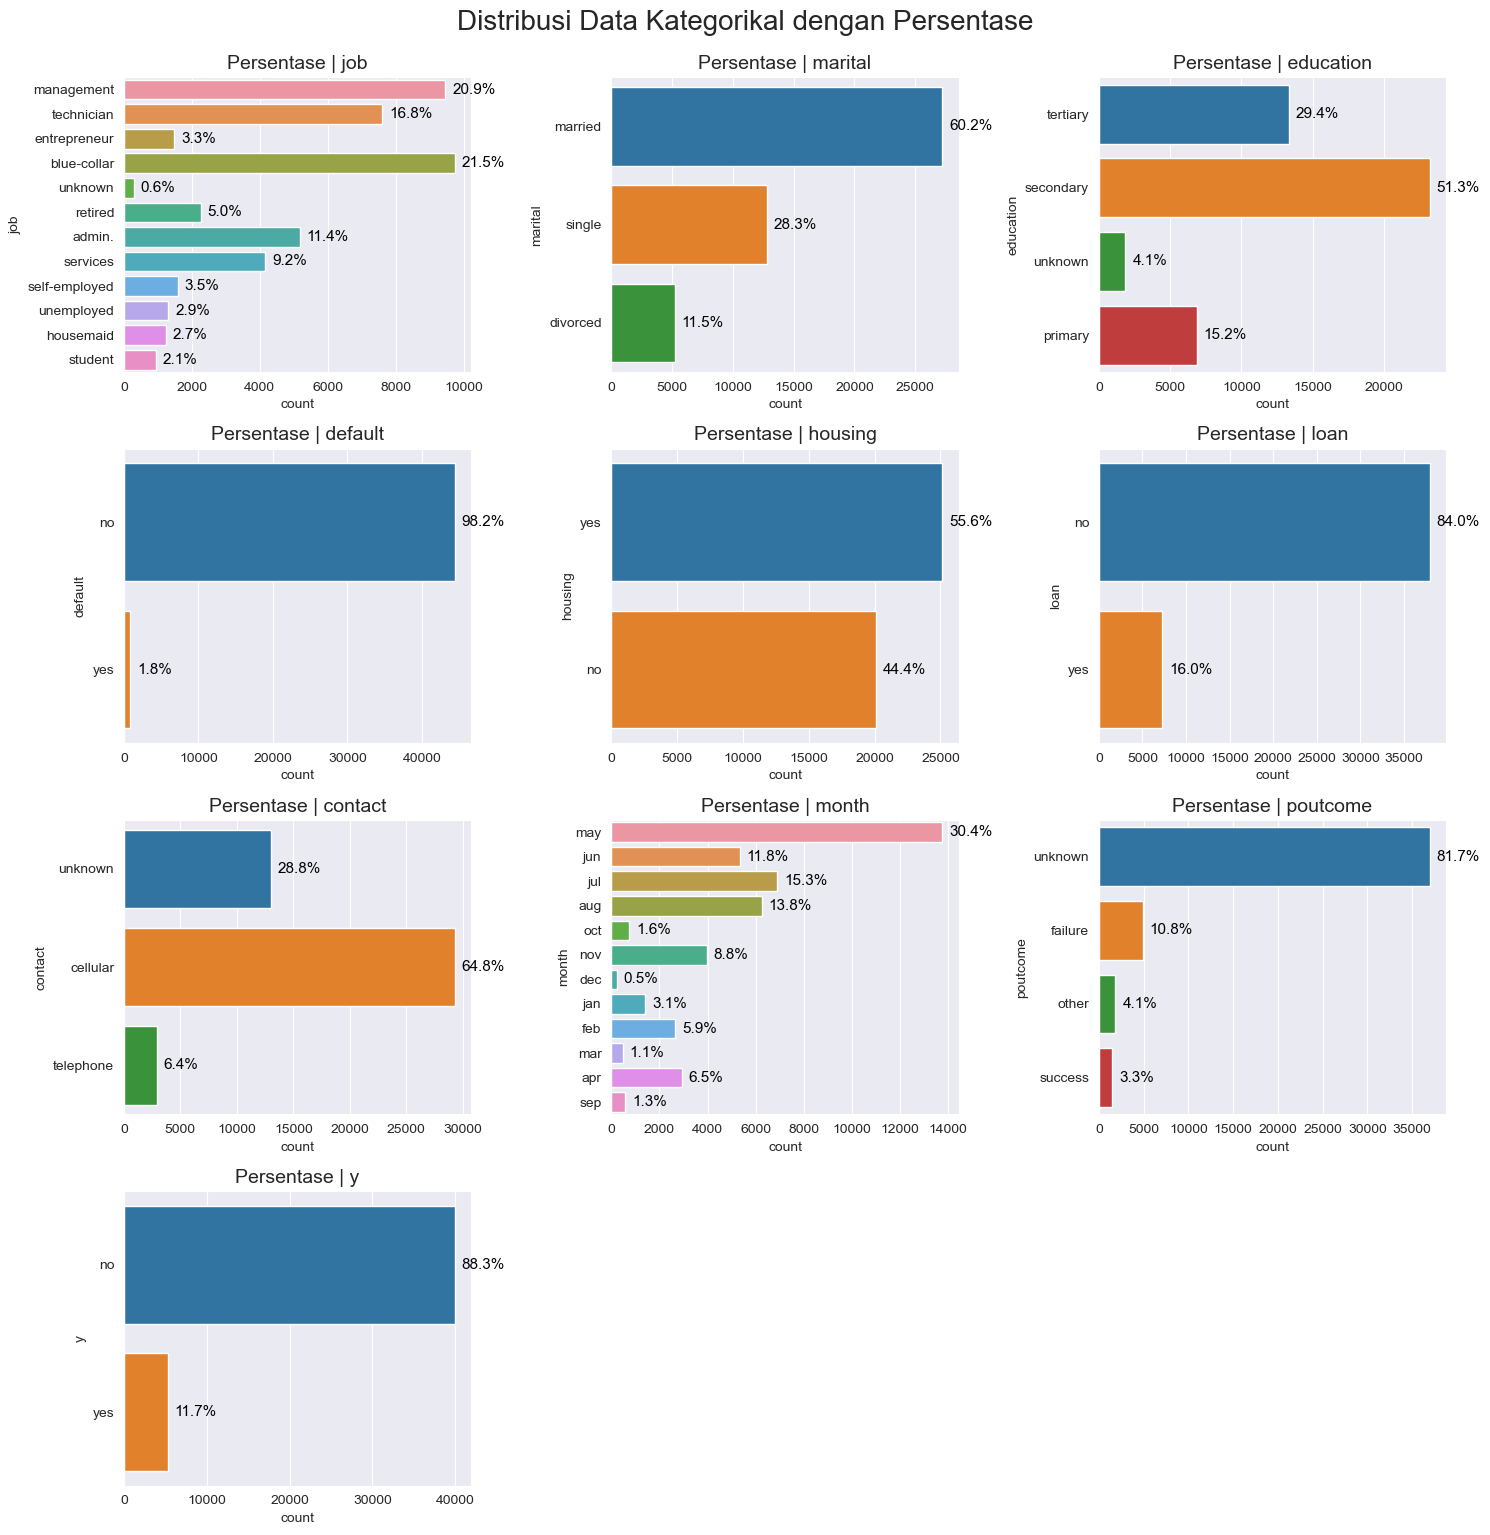

In [12]:
plt.figure(figsize=(15, 15))
for i in range(len(cats)):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df, y=cats[i])  
    plt.xticks(rotation=0)
    plt.tight_layout()
    ax = plt.gca()
    for p in ax.patches:
        percentage = f"{100 * p.get_width() / len(df):.1f}%"
        ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                    textcoords='offset points')
    plt.title(f"Persentase | {cats[i]}", fontsize=14)  
plt.suptitle("Distribusi Data Kategorikal dengan Persentase", fontsize=20, y=1.02)
plt.show()

Univariate (Categorical) :
- kolom `job`: memiliki 12 jenis unik pekerjaan. Mayoritas nasabah dengan proporsi 21.5 % memiliki pekerjaan sebagai "blue-collar". <br>
- kolom `marital`: Terdapat 3 status unik perkawinan. Mayoritas nasabah dengan proporsi 60.2% memiliki status perkawinan "married".<br>
- kolom `education`: memiliki 4 tingkatunik pendidikan. Mayoritas nasabah dengan proporsi 51.3% memiliki tingkat pendidikan "secondary". <br>
- kolom `default`: memiliki 2 nilai unik yang merepresentasikan apakah nasabah memiliki riwayat kredit bermasalah/tidak(gagal bayar). Mayoritas nasabah dengan proporsi 98.2 %  tidak memiliki masalah kredit (nilai "no"). <br>
- kolom `housing`: Terdapat 2 nilai unik yang merepresentasikan apakah nasabah memiliki pinjaman perumahan atau tidak. Mayoritas nasabah dengan proporsi 55.6% memiliki pinjaman perumahan (nilai "yes"). <br>
- kolom `loan`: memiliki 2 nilai unik yang merepresentasikan apakah klien atau prospek memiliki pinjaman pribadi atau tidak. Mayoritas nasabah dengan proporsi 84% tidak memiliki pinjaman pribadi (nilai "no"). <br>
- kolom `contact`: Terdapat 3 jenis komunikasi kontak dengan nasabah. Mayoritas kontak dengan proporsi 64.8% dilakukan melalui komunikasi seluler. <br>
- kolom `month`: Terdapat 12 bulan kontak terakhir. Mayoritas kontak dengan proporsi 30.4% terjadi pada bulan Mei . <br>
- kolom `poutcome`: Terdapat 4 hasil campaign pemasaran sebelumnya. Mayoritas hasil campaign pemasaran sebelumnya dengan proporsi 81.7% adalah "unknown" . <br>
- kolom `y`: terdapat 2 jenis respon nasabah terhadap campaign. Mayoritas respon di "no" dengan proporsi 11.7%.

**Insight:**
* Tidak terdapat null values di setiap baris sehingga tidak perlu dilakukan handling missing values saat data preprocessing
* Hampir semua kolom positively skewed dan memiliki outliers, kecuali pada kolom `day`
    * Untuk Semua kolom yang berdistribusi positively skewed kami mempertimbangkan untuk  penanganan outliers menggunakan Z-score untuk menentukan seberapa jauh suatu data berada dari rata-rata,dengan Z-score tinggi dianggap sebagai outlier atau nilai ekstrem dan standardisasi transformasi untuk mengubah data menjadi memiliki rata-rata nol dan simpangan baku satu, sehingga membantu dalam menyejajarkan data.
* Tidak ada kolom kategori yang perlu didrop karena tiap kolom kategori memiliki nilai unik lebih dari 1 dan tidak mempunyai nilai unik yang terlalu banyak(sebanyak jumlah baris)
* Kolom balance memiliki minus values karena dirasa agak kurang make sense maka kami mempertimbangkan untuk mereplace minus values dengan angka 0 dengan asumsi bahwa nasabah tidak memiliki uang yang tersisa di rekening
* Kolom target `y` memiliki tipe data string dan distribusi data yang timpang dengan persentase 88.3% untuk no dan 11.7% untuk yes. Perlu diubah tipe data kolom 'y' menjadi integer/numerik, dan handling ketimpangan values dengan class imbalance

## Multivariate Analysis

In [23]:
df[cats].describe()

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [42]:
print(f"Persentase pelanggan yang convert pada campaign sebelumnya:\
 {round(len(df[df['poutcome'] == 'success'])/(len(df[df['poutcome'] != 'unknown']))*100, 2)}%")

Persentase pelanggan yang convert pada campaign sebelumnya: 18.31%


In [43]:
for cat in cats:
    print(f'Category: {cat}')
    print(round(df[cat].value_counts() / len(df) * 100, 2), '\n')

print(f"Persentase pelanggan yang convert pada campaign sebelumnya:\
 {round(len(df[df['poutcome'] == 'success'])/(len(df[df['poutcome'] != 'unknown']))*100, 2)}%")

Category: job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64 

Category: marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64 

Category: education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64 

Category: default
no     98.2
yes     1.8
Name: default, dtype: float64 

Category: housing
yes    55.58
no     44.42
Name: housing, dtype: float64 

Category: loan
no     83.98
yes    16.02
Name: loan, dtype: float64 

Category: contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64 

Category: month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
o

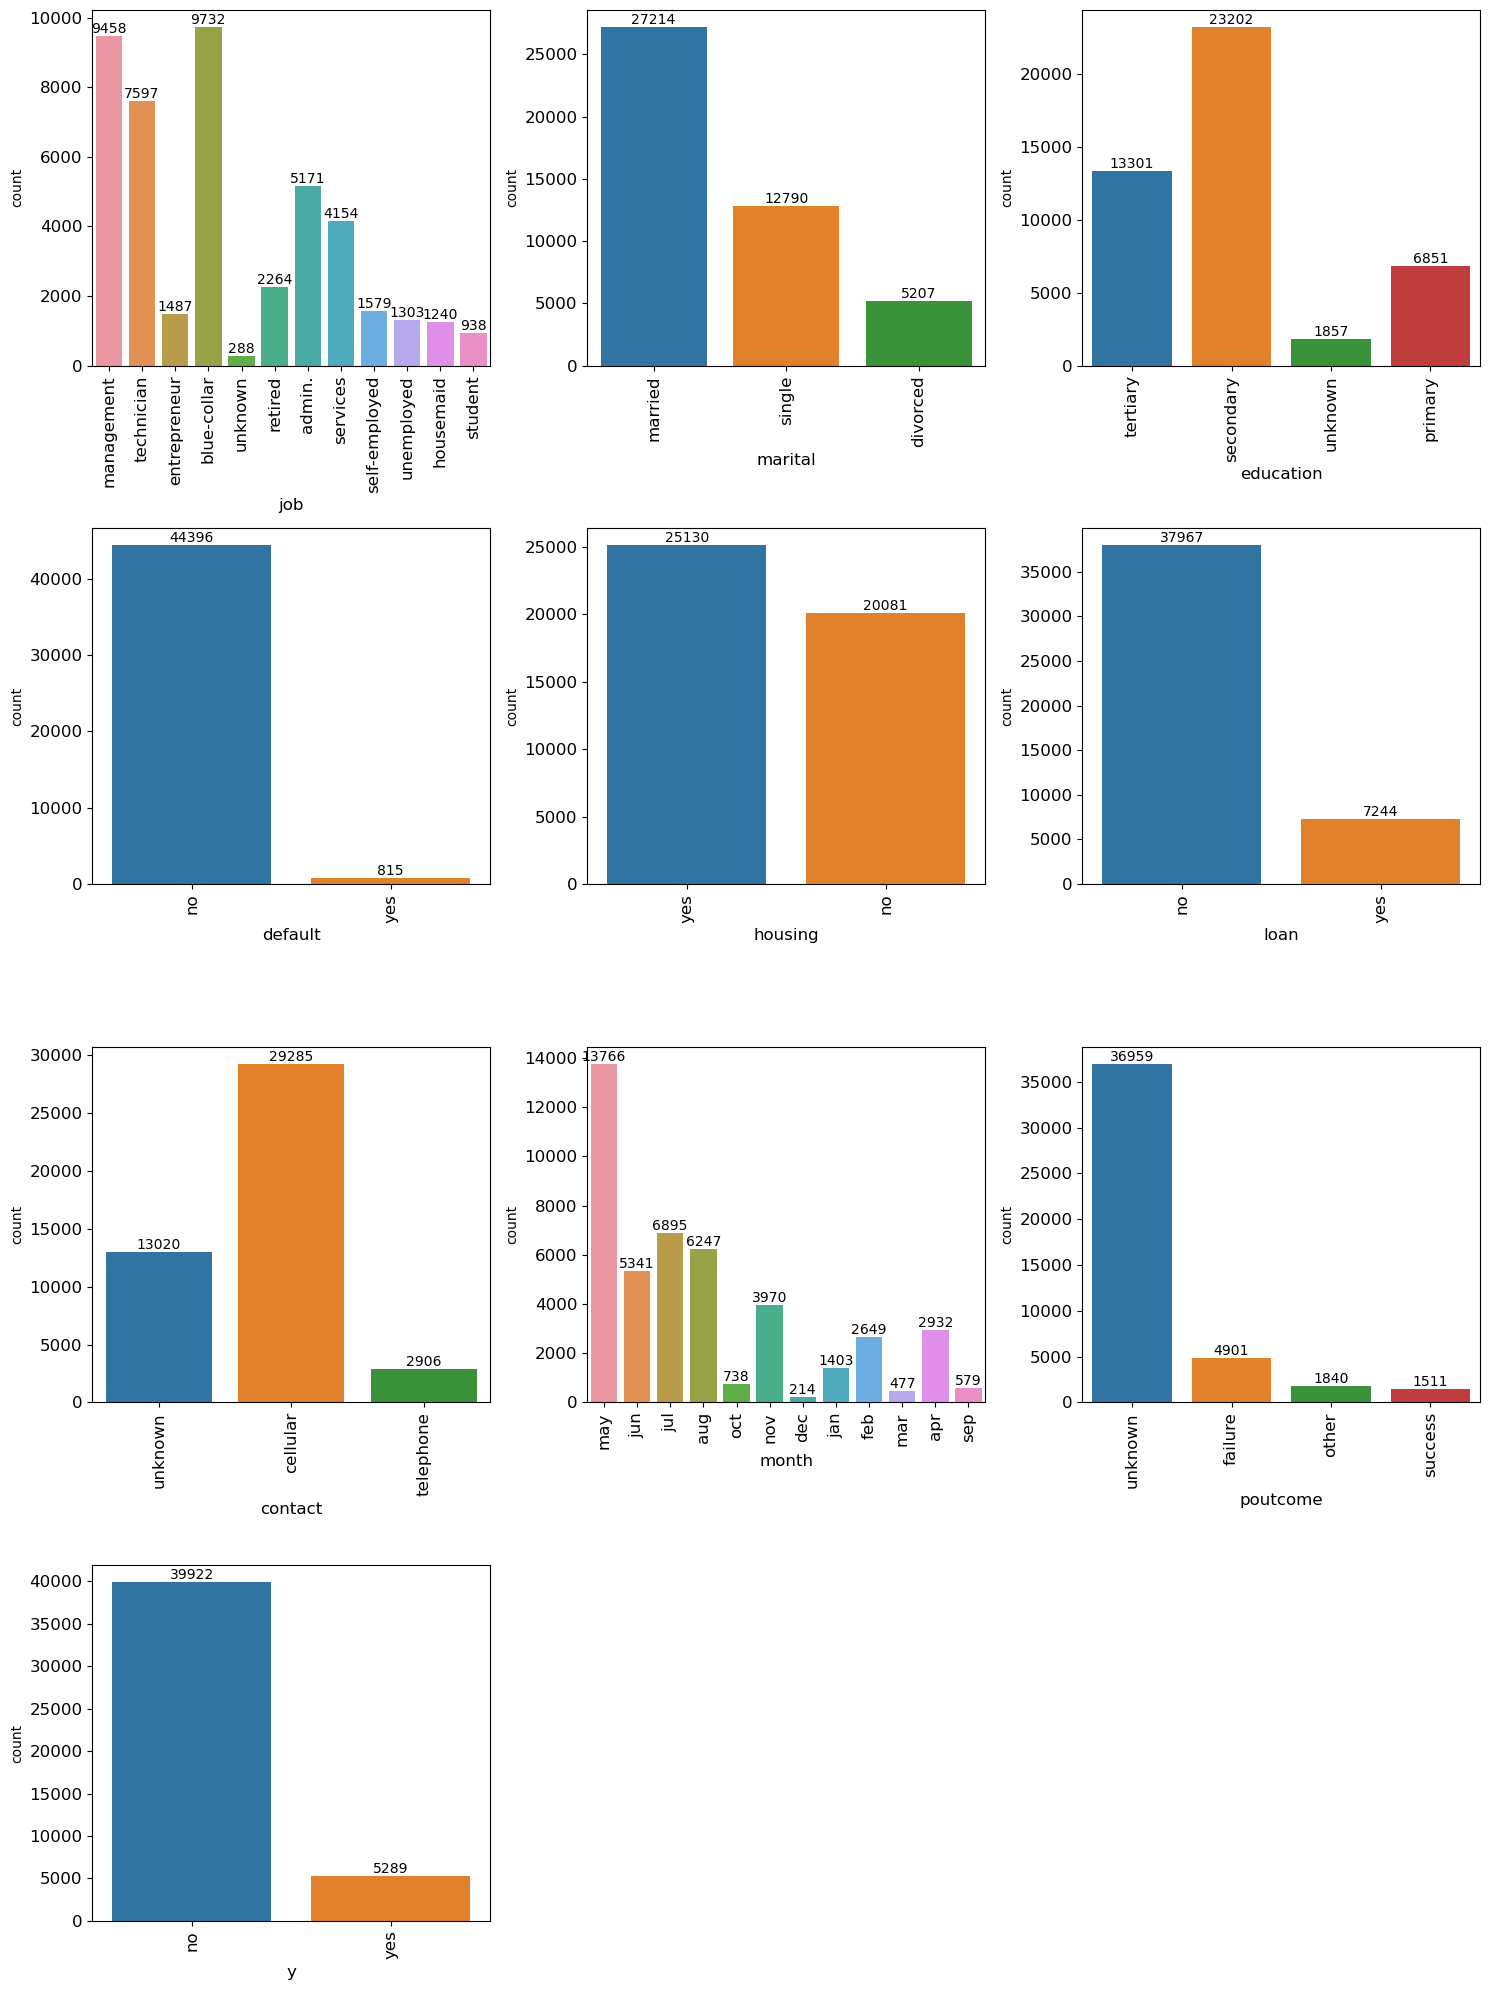

In [220]:
fig = plt.figure(figsize=(15, 20))
for i in range(len(cats)):
    ax = sns.countplot(x = df[cats[i]], ax = fig.add_subplot(4,3, i+1))
    ax.bar_label(ax.containers[0])
    plt.xticks(fontsize=12, rotation = 90)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel = cats[i], fontsize=12)
    plt.tight_layout()

- Kolom categorical pada fitur job dengan proporsi masing-masing lebih dari 20% termasuk dalam kelompok blue-collar dan management
- Kolom categorical yang dominan adalah married untuk fitur marital, secondary untuk fitur education, no untuk fitur default, yes untuk fitur housing, no untuk fitur loan, cellular untuk fitur contact, unknown untuk fitur poutcome dan no untuk fitur y
- Sepertinya terdapat beberapa fitur categorical yang imbalance diantaranya fitur default sebesar 98.2% untuk no, loan sebesar 83.98% untuk no dan poutcome sebesar 81.75% untuk unknown
- Class imbalance tampaknya juga terjadi yaitu sebesar 88.3% untuk no dan 11.7% untuk yes
- Sebesar 18.31% customer yang berhasil convert/subscribe pada campaign sebelumnya dan 11.7% customer yang convert pada campaign saat ini. Hal tersebut menunjukkan adanya penurunan persentase customer yang convert untuk subscribe term deposit

## =========================================================================

- Fitur job memiliki jumlah unique values sebesar 12 dengan frekuensi job terbesar adalah blue-collar sebesar 9732, kemudian management sebesar 9458. Sebanyak 288 job dari customer merupakan unknown
- Fitur marital memiliki jumlah unique values sebesar 3 dengan frekuensi terbesar adalah married sebesar 27214, terkecil divorced sebesar 5207
- Fitur education memiliki jumlah unique values sebesar 4 dengan frekuensi terbesar adalah secondary sebesar 2302, kemudian tertiary sebesar 13301 dan terkecil unknown sebesar 1857
- Fitur default menyatakan pernah tercatat sebelumnya sebagai customer gagal bayar kredit yang memiliki jumlah unique values sebesar 2 dengan frekuensi terbesar adalah no sebesar 44396, terkecil yes sebesar 815
- Fitur housing menyatakan customer sedang memiliki kredit rumah yang mempunyai jumlah unique values sebesar 2 dengan frekuensi terbesar adalah yes sebesar 25130, terkecil no sebesar 20081
- Fitur loan menyatakan customer sedang memilki kredit pribadi yang mempunyai jumlah unique values sebesar 2 dengan frekuensi terbesar adalah no sebesar 37967, terkecil yes sebesar 7244
- Fitur contact menyatakan jenis komunikasi yang digunakan untuk menghubungi/contact customer terakhir kali pada campaign saat ini yang memiliki jumlah unique values sebesar 3 dengan frekuensi terbesar adalah cellular sebesar 29285, terkecil telephone sebesar 2906
- Fitur month menyatakan bulan dimana customer menerima contact terakhir kali pada campaign saat ini yang memiliki jumlah unique values sebesar 12 yaitu jan-des dengan frekuensi terbesar adalah may sebesar 13766, kemudian jul sebesar 6895, terkecil dec sebesar 214
- Fitur poutcome mendeskripsikan hasil dari campaign sebelumnya yang memiliki jumlah unique values sebesar 4 dengan frekuensi terbesar adalah unknown sebesar 36959 yang menyatakan customer belum pernah menerima contact pada campaign sebelumnya, terkecil success sebesar 1511
- Fitur y menunjukkan apakah saat ini customer berlangganan deposito atau tidak yang memiliki jumlah unique values sebesar 2 dengan frekuensi terbesar adalah no sebesar 39922, terkecil yes sebesar 5289

<Figure size 1500x1500 with 0 Axes>

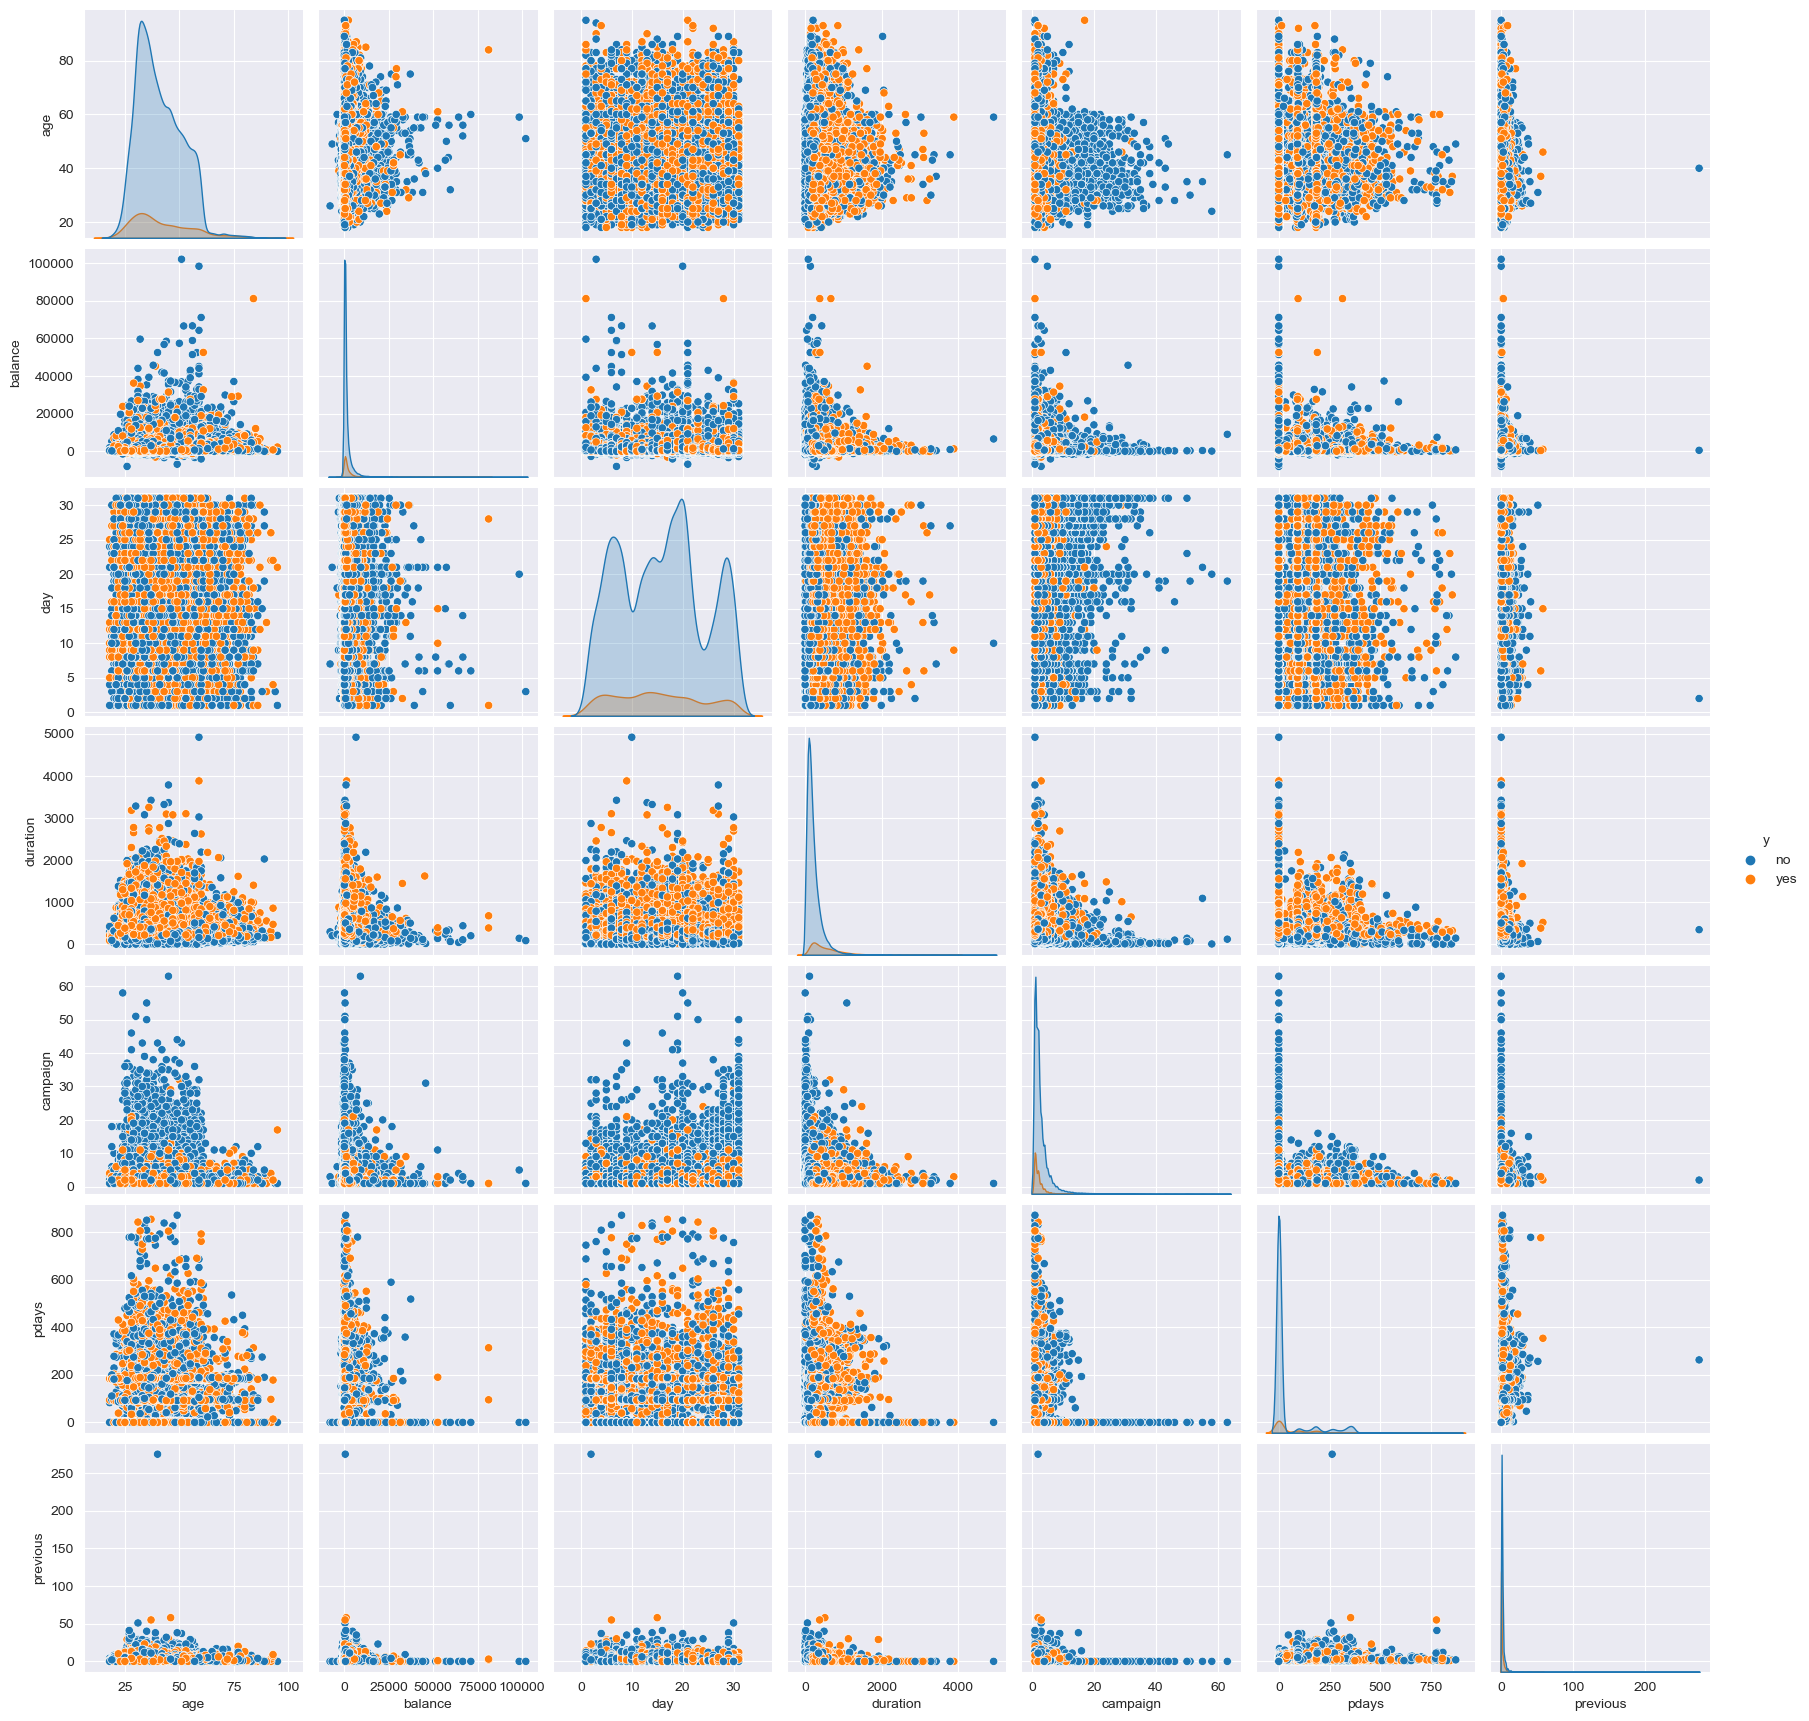

In [51]:
fig = plt.figure(figsize = (15, 15))
sns.pairplot(df, diag_kind = 'kde', hue = 'y')

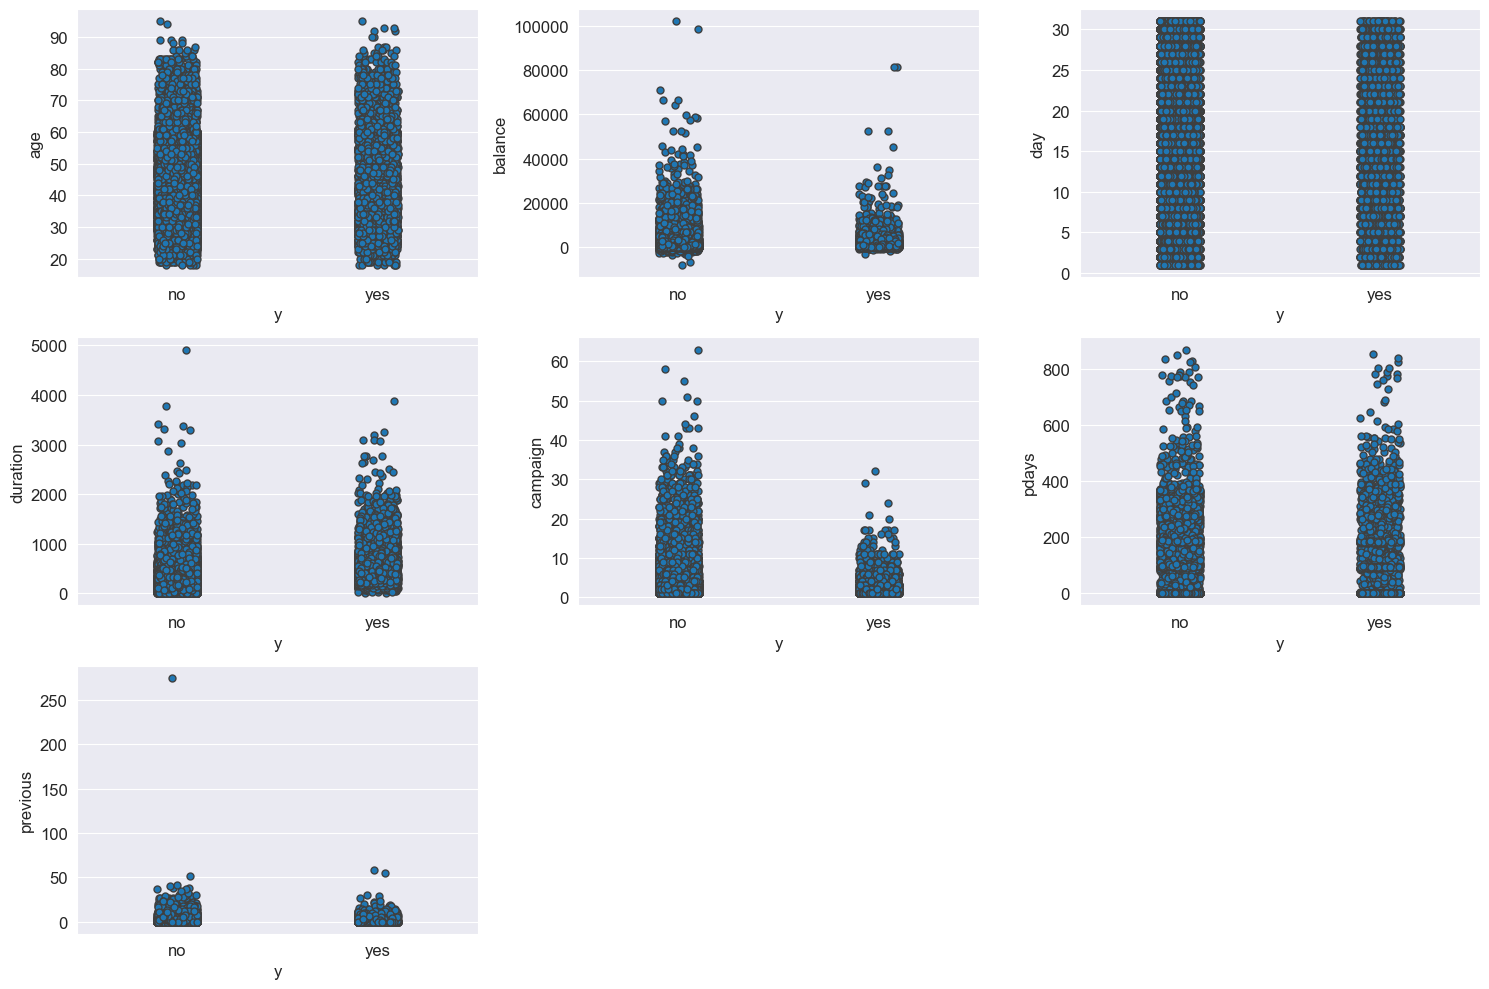

In [63]:
fig = plt.figure(figsize = (15, 10))
for i in range(len(nums)):
    sns.stripplot(x = df['y'], y = df[nums[i]], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), linewidth = 1)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel(xlabel = 'y', fontsize = 12)
    plt.ylabel(ylabel = nums[i], fontsize = 12)
    plt.tight_layout()

<Axes: >

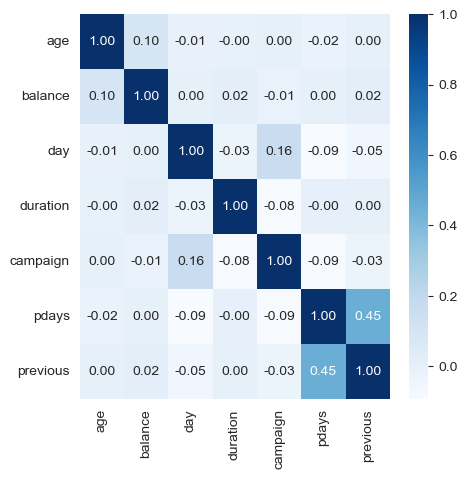

In [66]:
fig = plt.figure(figsize = (5, 5))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f', ax = fig.add_subplot(1,1, 1))

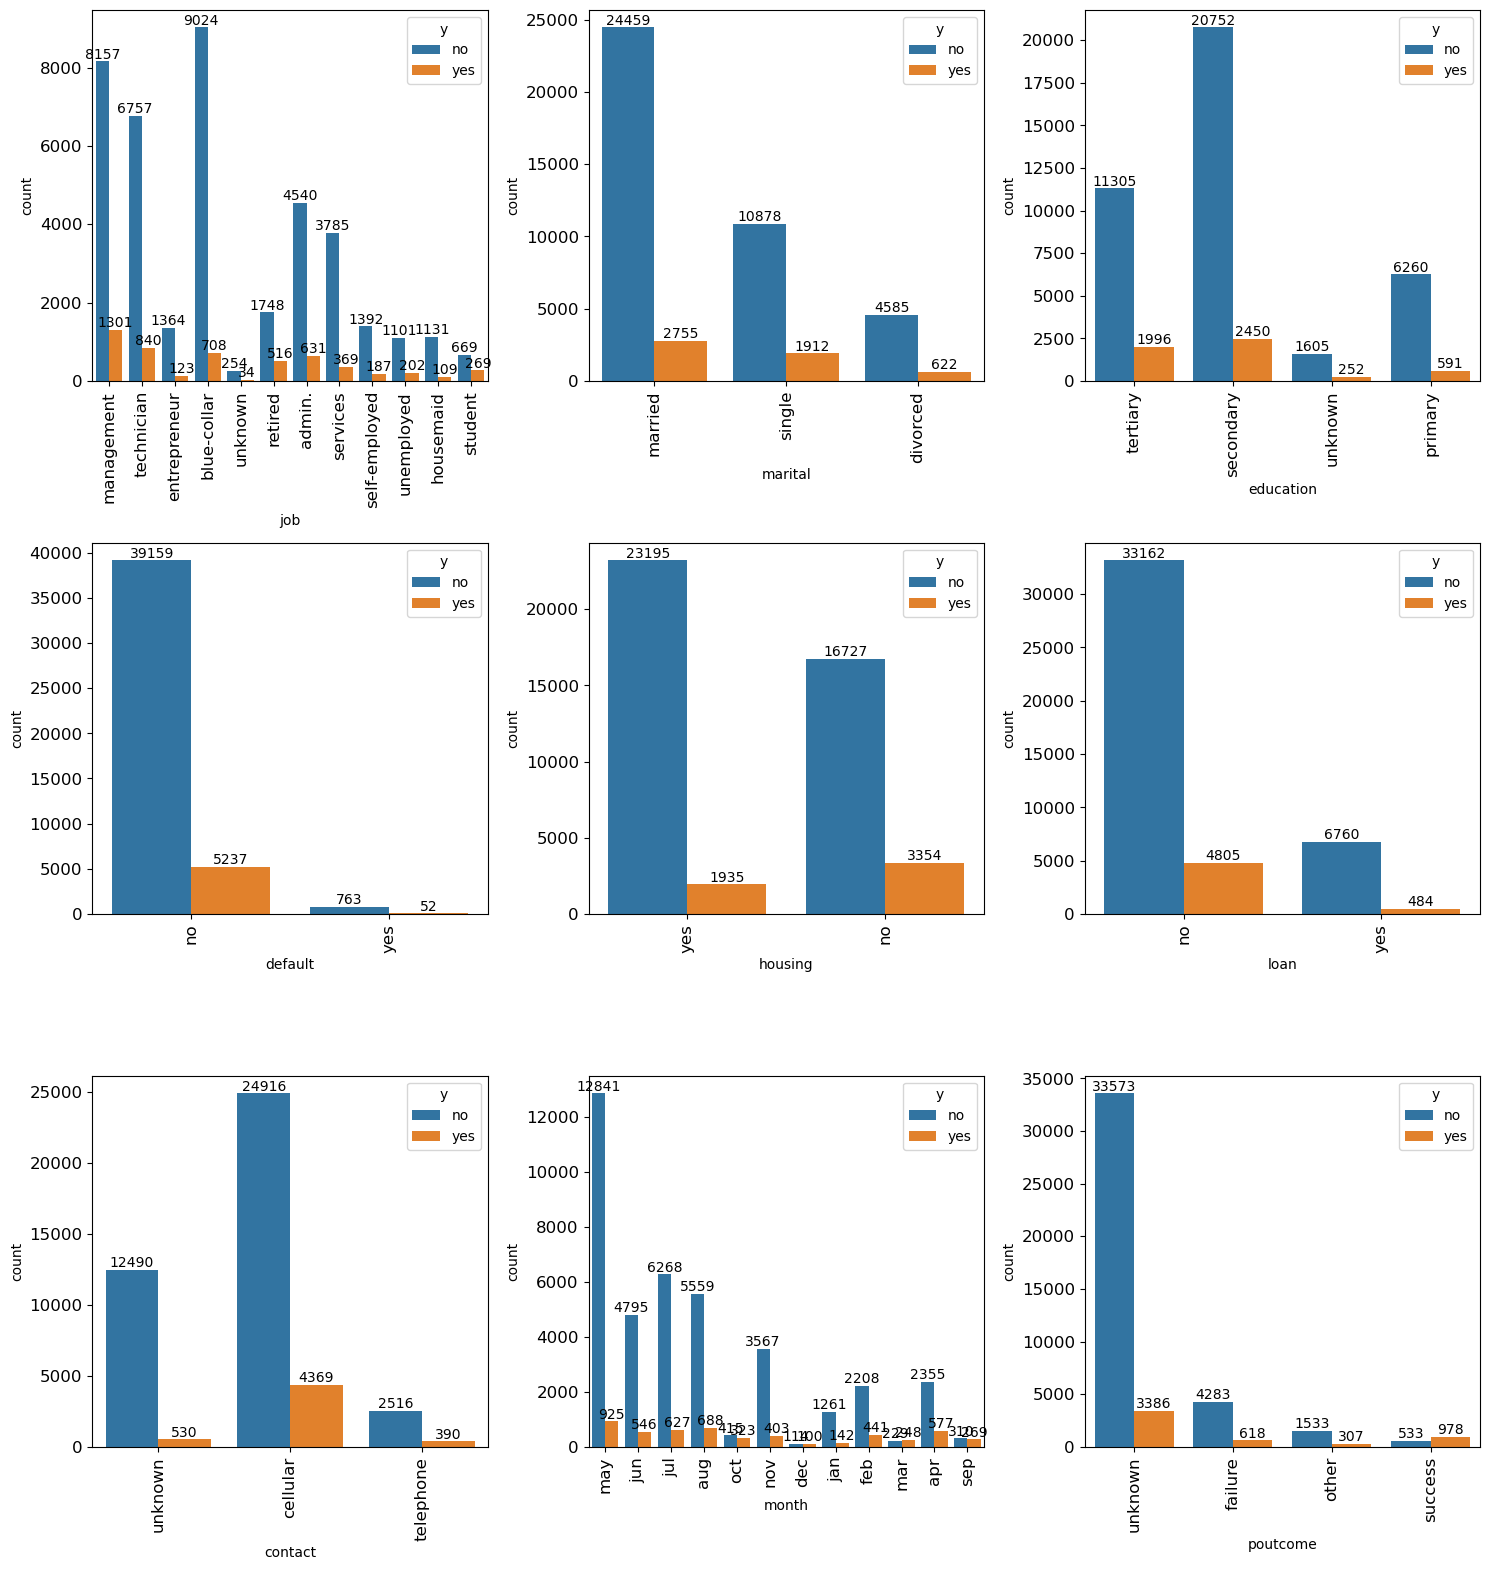

In [152]:
fig = plt.figure(figsize=(15, 20))
for i in range(len(cats)):
    if cats[i] not in ['y']:
        ax = sns.countplot(x = df[cats[i]], ax = fig.add_subplot(math.ceil(len(cats)/3),3, i+1), hue = df['y'])
        for i in range(len(ax.containers)):
            ax.bar_label(ax.containers[i])
        plt.xticks(fontsize=12, rotation = 90)
        plt.yticks(fontsize=12)
#         plt.xlabel(xlabel = cats[i], fontsize=12)
        plt.tight_layout()

- Hubungan antara fitur campaign dan kelas y menunjukkan bahwa customer yang menerima contact dalam campaign lebih dari 20 kali cenderung tidak subscribe sehingga perlu ditentukan threshold yang tepat sehingga campaign lebih optimal
- Korelasi antara masing-masing fitur numerik pada pairplot tidak menunjukkan adanya pola atau pemisahan cluster yang nyata
- Fitur poutcome dengan kategori success lebih banyak ditemukan pada kelompok yes dalam target y sekitar 64% dibanding kelompok no yang menunjukkan bahwa customer yang sebelumnya telah subscribed pada campaign sebelumnya mayoritas tetap subscribed pada campaign saat ini
- Pekerjaan management merupakan pekerjaan terbesar untuk customer yang subscribed terhadap campaign yang dilakukan saat ini, selain itu terdapat married pada marital status, secondary education, customer tanpa housing loan/KPR, dan customer tanpa kredit individual

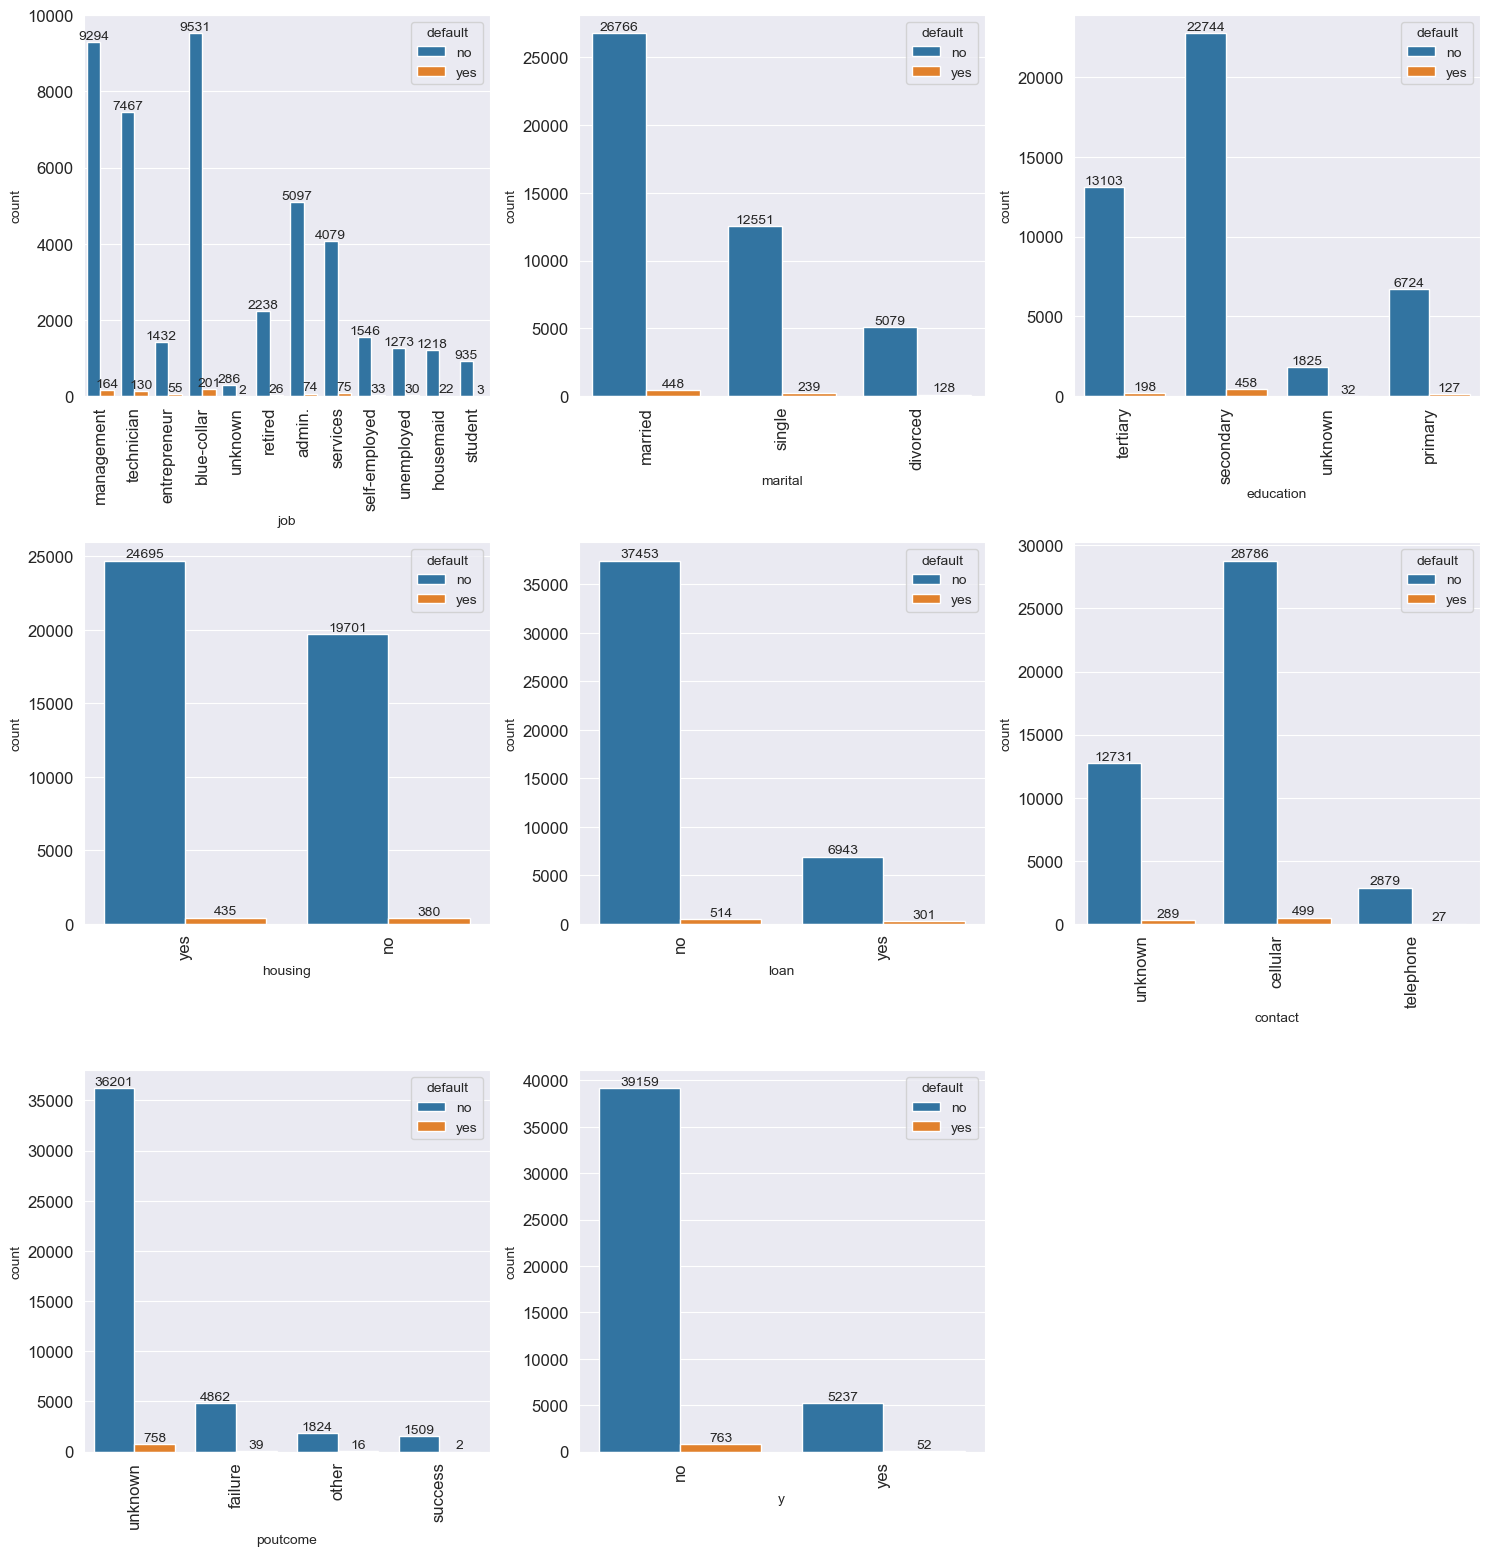

In [102]:
j = 0
fig = plt.figure(figsize=(15, 20))
for i in range(len(cats)):
    if cats[i] not in ['default', 'month']:
        ax = sns.countplot(x = df[cats[i]], ax = fig.add_subplot(math.ceil(len(cats)/3),3, j+1), hue = df['default'])
        for i in range(len(ax.containers)):
            ax.bar_label(ax.containers[i])
        plt.xticks(fontsize=12, rotation = 90)
        plt.yticks(fontsize=12)
        #plt.xlabel(xlabel = cats[i], fontsize=12)
        plt.tight_layout()
        j += 1

In [99]:
cats

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

age          job  marital  education default  balance housing loan  \
13494   59      retired  married    unknown     yes     -114      no  yes   
20100   35   management  married   tertiary      no      106      no  yes   
956     28  blue-collar  married  secondary      no      225     yes  yes   
15274   34  blue-collar   single  secondary      no       39      no   no   
22441   32   technician   single  secondary      no       90      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
13494  cellular    9   jul       611         2     -1         0  unknown  no  
20100  cellular   11   aug       588         2     -1         0  unknown  no  
956     unknown    7   may       866         2     -1         0  unknown  no  
15274  cellular   18   jul       138         3     -1         0  unknown  no  
22441  cellular   22   aug       278         2     -1         0  unknown  no

In [143]:
df[df['y'] == 'yes']['y'].count(), df[df['y'] == 'no']['y'].count(), len(df)

(5289, 39922, 45211)

In [141]:
round(df[df['y'] == 'yes']['y'].count() / (df[df['y'] == 'no']['y'].count() + df[df['y'] == 'yes']['y'].count()) * 100, 2)

11.7

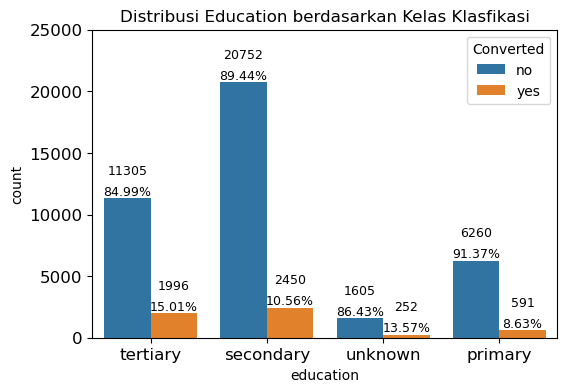

In [56]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=9, ha='center', va='bottom')

fig = plt.figure(figsize=(6, 4))
ax = sns.countplot(x = df['education'], ax = fig.add_subplot(1,1, 1), hue = df['y'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], padding = 15, fontsize = 9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(top = 25000)
plt.legend(title = 'Converted')
plt.title('Distribusi Education berdasarkan Kelas Klasfikasi')
percentage_above_bar_relative_to_xgroup(ax)
#plt.xlabel(xlabel = cats[i], fontsize=12)

In [14]:
1996/(11305+1996), 2450/(20752+2450)

(0.15006390496955116, 0.10559434531505904)

In [7]:
for i in range(len(list(df['education'].unique()))):
    print(f"Education {list(df['education'].unique())[i]}: {df[df['education'] == list(df['education'].unique())[i]]['education'].count()} customers, conversion rate:\
 {round(df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'yes')]['education'].count() / ((df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'yes')]['education'].count()) + (df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'no')]['education'].count())) * 100, 2)} %")

Education tertiary: 13301 customers, conversion rate: 15.01 %
Education secondary: 23202 customers, conversion rate: 10.56 %
Education unknown: 1857 customers, conversion rate: 13.57 %
Education primary: 6851 customers, conversion rate: 8.63 %


Text(0.5, 1.0, 'Distribusi Job berdasarkan Kelas Klasfikasi')

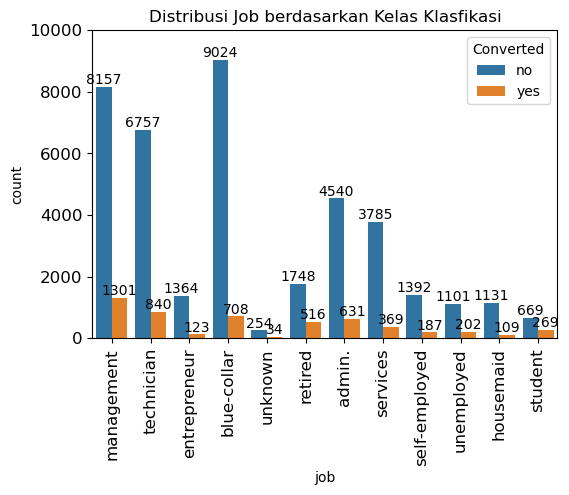

In [62]:
fig = plt.figure(figsize=(6, 4))
ax = sns.countplot(x = df['job'], ax = fig.add_subplot(1,1, 1), hue = df['y'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)
plt.ylim(top = 10000)
plt.legend(title = 'Converted')
plt.title('Distribusi Job berdasarkan Kelas Klasfikasi')
#plt.xlabel(xlabel = cats[i], fontsize=12)

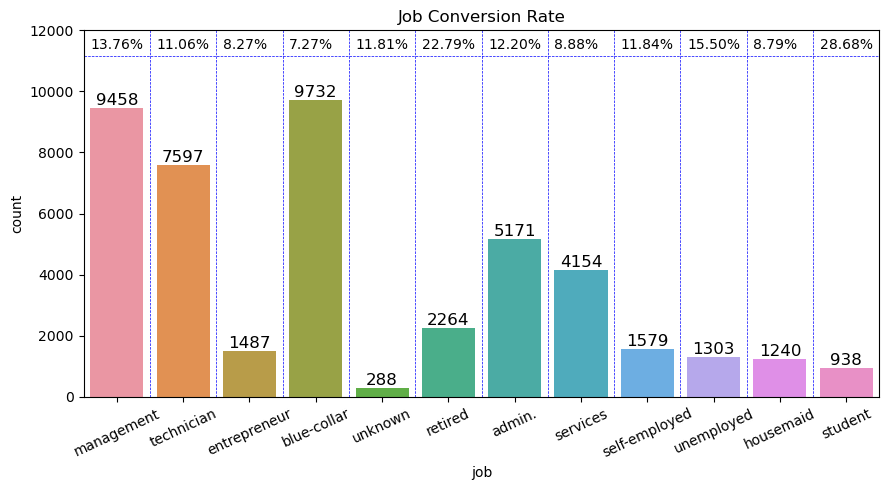

In [530]:
percentage = [f"{(df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'yes')]['job'].count() / ((df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'yes')]['job'].count()) + (df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'no')]['job'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['job'].unique())))]
fig = plt.figure(figsize = (9, 5))
ax = sns.countplot(x = df['job'], ax = fig.add_subplot(1, 1, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
# plt.xticks(rotation = 90)
ax.set_ylim(top = 12000)
plt.title('Job Conversion Rate')
ax.set_xticklabels(list(df['job'].unique()), rotation = 25, size = 10)
# plt.xticks(ticks = list(df['job'].unique()))
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['job'].unique())):
    ax.text(loc[0][i]-0.001, ax.get_ylim()[1] - 620, percentage[i], fontsize = 10)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 850, color = 'blue', ls = '--', lw = 0.5)
plt.tight_layout()

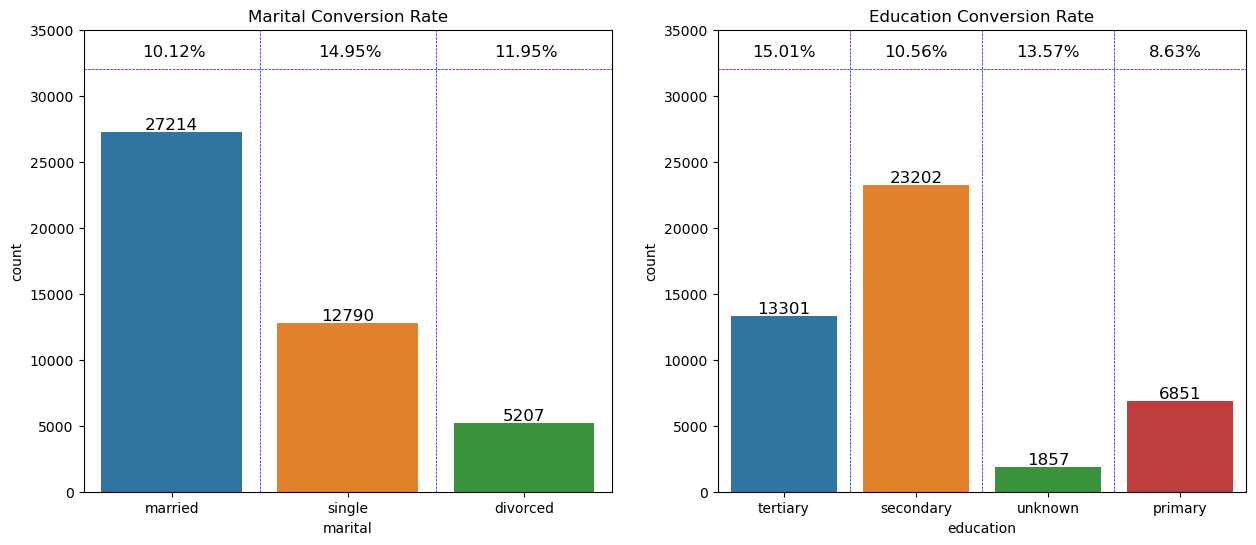

In [438]:
percentage = [f"{(df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'yes')]['marital'].count() / ((df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'yes')]['marital'].count()) + (df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'no')]['marital'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['marital'].unique())))]
fig = plt.figure(figsize = (15, 6))
ax = sns.countplot(x = df['marital'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 35000)
plt.title('Marital Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['marital'].unique())):
    ax.text(loc[0][i] + 0.23, ax.get_ylim()[1] - 2000, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)

percentage = [f"{(df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'yes')]['education'].count() / ((df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'yes')]['education'].count()) + (df[(df['education'] == list(df['education'].unique())[i]) & (df['y'] == 'no')]['education'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['education'].unique())))]
ax = sns.countplot(x = df['education'], ax = fig.add_subplot(1, 2, 2))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 35000)
plt.title('Education Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['education'].unique())):
    ax.text(loc[0][i] + 0.16, ax.get_ylim()[1] - 2000, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)

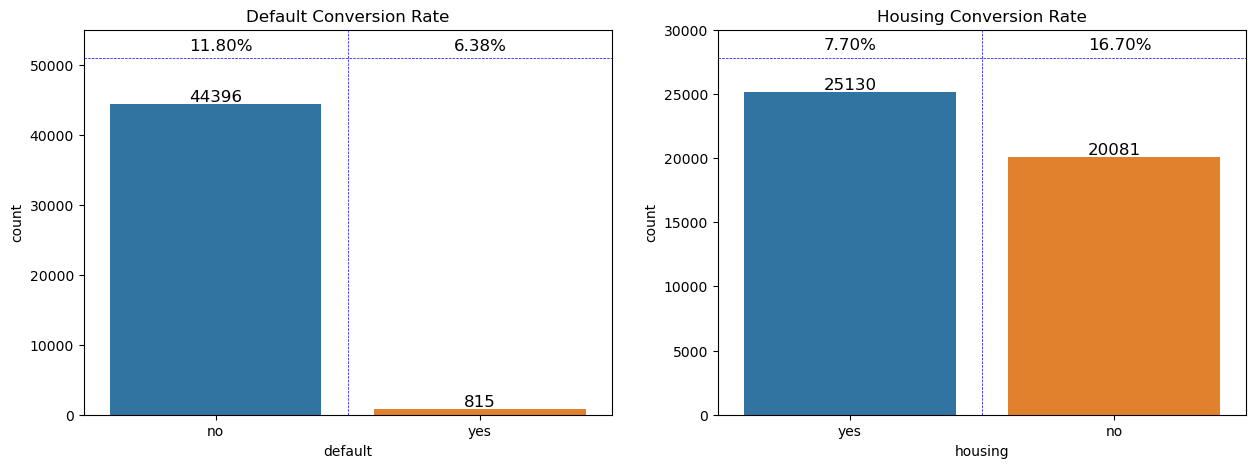

In [448]:
percentage = [f"{(df[(df['default'] == list(df['default'].unique())[i]) & (df['y'] == 'yes')]['default'].count() / ((df[(df['default'] == list(df['default'].unique())[i]) & (df['y'] == 'yes')]['default'].count()) + (df[(df['default'] == list(df['default'].unique())[i]) & (df['y'] == 'no')]['default'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['default'].unique())))]
fig = plt.figure(figsize = (15, 5))
ax = sns.countplot(x = df['default'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 55000)
plt.title('Default Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['default'].unique())):
    ax.text(loc[0][i] + 0.3, ax.get_ylim()[1] - 3000, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 4000, color = 'blue', ls = '--', lw = 0.5)

percentage = [f"{(df[(df['housing'] == list(df['housing'].unique())[i]) & (df['y'] == 'yes')]['housing'].count() / ((df[(df['housing'] == list(df['housing'].unique())[i]) & (df['y'] == 'yes')]['housing'].count()) + (df[(df['housing'] == list(df['housing'].unique())[i]) & (df['y'] == 'no')]['housing'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['housing'].unique())))]
ax = sns.countplot(x = df['housing'], ax = fig.add_subplot(1, 2, 2))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 30000)
plt.title('Housing Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['housing'].unique())):
    ax.text(loc[0][i] + 0.3, ax.get_ylim()[1] - 1500, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 2200, color = 'blue', ls = '--', lw = 0.5)

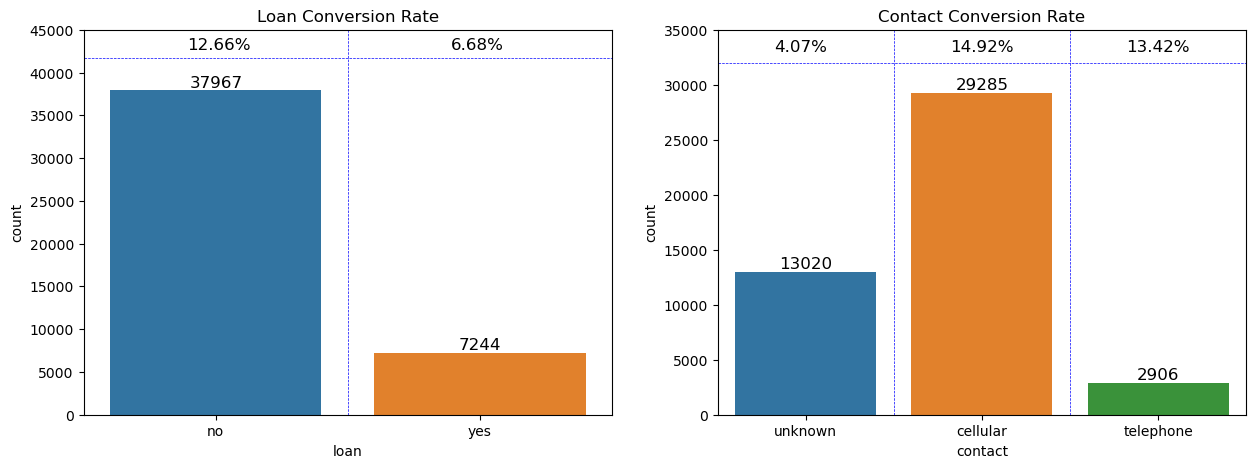

In [452]:
percentage = [f"{(df[(df['loan'] == list(df['loan'].unique())[i]) & (df['y'] == 'yes')]['loan'].count() / ((df[(df['loan'] == list(df['loan'].unique())[i]) & (df['y'] == 'yes')]['loan'].count()) + (df[(df['loan'] == list(df['loan'].unique())[i]) & (df['y'] == 'no')]['loan'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['loan'].unique())))]
fig = plt.figure(figsize = (15, 5))
ax = sns.countplot(x = df['loan'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 45000)
plt.title('Loan Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['loan'].unique())):
    ax.text(loc[0][i] + 0.29, ax.get_ylim()[1] - 2300, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3300, color = 'blue', ls = '--', lw = 0.5)

percentage = [f"{(df[(df['contact'] == list(df['contact'].unique())[i]) & (df['y'] == 'yes')]['contact'].count() / ((df[(df['contact'] == list(df['contact'].unique())[i]) & (df['y'] == 'yes')]['contact'].count()) + (df[(df['contact'] == list(df['contact'].unique())[i]) & (df['y'] == 'no')]['contact'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['contact'].unique())))]
ax = sns.countplot(x = df['contact'], ax = fig.add_subplot(1, 2, 2))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 35000)
plt.title('Contact Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['contact'].unique())):
    ax.text(loc[0][i] + 0.22, ax.get_ylim()[1] - 2000, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)

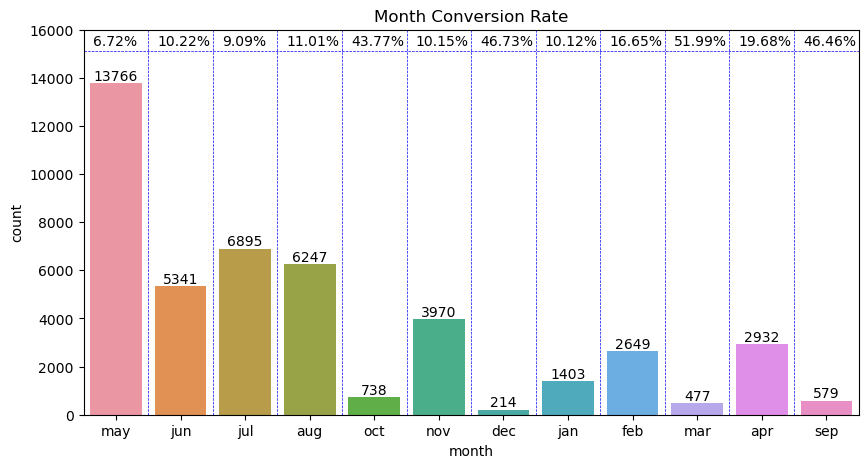

In [462]:
percentage = [f"{(df[(df['month'] == list(df['month'].unique())[i]) & (df['y'] == 'yes')]['month'].count() / ((df[(df['month'] == list(df['month'].unique())[i]) & (df['y'] == 'yes')]['month'].count()) + (df[(df['month'] == list(df['month'].unique())[i]) & (df['y'] == 'no')]['month'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['month'].unique())))]
fig = plt.figure(figsize = (10, 5))
ax = sns.countplot(x = df['month'], ax = fig.add_subplot(1, 1, 1))
ax.bar_label(ax.containers[0], fontsize = 10)
ax.set_ylim(top = 16000)
plt.title('Month Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['month'].unique())):
    ax.text(loc[0][i] + 0.04, ax.get_ylim()[1] - 650, percentage[i], fontsize = 10)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 900, color = 'blue', ls = '--', lw = 0.5)

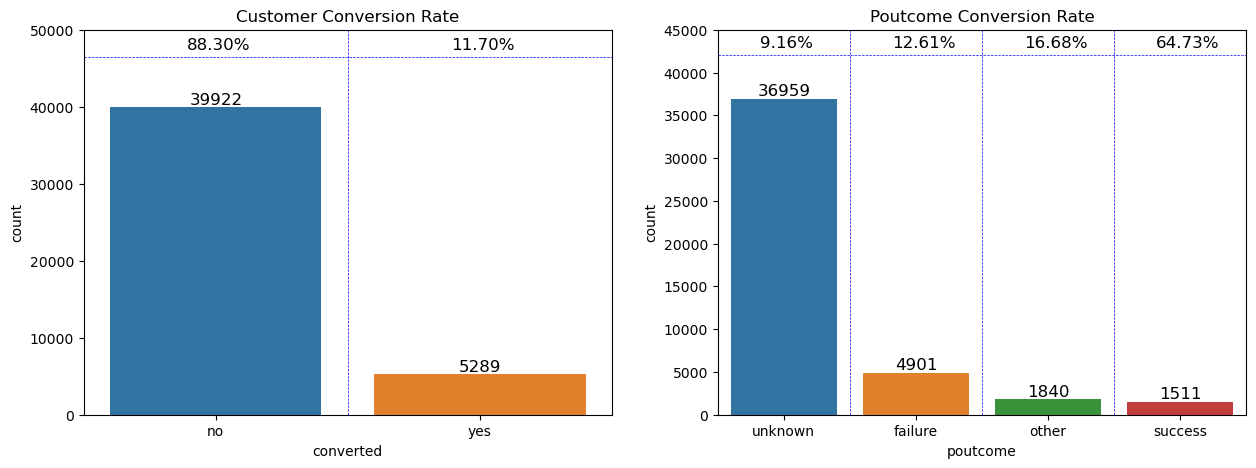

In [488]:
percentage = [f"{(df[(df['y'] == list(df['y'].unique())[i])]['y'].count() / (((df[df['y'] == 'yes'])['y'].count()) + (df[(df['y'] == 'no')]['y'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['y'].unique())))]
fig = plt.figure(figsize = (15, 5))
ax = sns.countplot(x = df['y'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 50000)
plt.title('Customer Conversion Rate')
plt.xlabel(xlabel = 'converted')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['y'].unique())):
    ax.text(loc[0][i] + 0.29, ax.get_ylim()[1] - 2550, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3600, color = 'blue', ls = '--', lw = 0.5)
# plt.savefig('img/Customer Conversion Rate.png', bbox_inches='tight')
# plt.show()

percentage = [f"{(df[(df['poutcome'] == list(df['poutcome'].unique())[i]) & (df['y'] == 'yes')]['poutcome'].count() / ((df[(df['poutcome'] == list(df['poutcome'].unique())[i]) & (df['y'] == 'yes')]['poutcome'].count()) + (df[(df['poutcome'] == list(df['poutcome'].unique())[i]) & (df['y'] == 'no')]['poutcome'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['poutcome'].unique())))]
ax = sns.countplot(x = df['poutcome'], ax = fig.add_subplot(1, 2, 2))
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_ylim(top = 45000)
plt.title('Poutcome Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['poutcome'].unique())):
    ax.text(loc[0][i] + 0.22, ax.get_ylim()[1] - 2100, percentage[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)

In [2]:
for i in range(len(list(df['job'].unique()))):
    print(f"Job {list(df['job'].unique())[i]}: {df[df['job'] == list(df['job'].unique())[i]]['job'].count()} customers, conversion rate:\
 {round(df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'yes')]['job'].count() / ((df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'yes')]['job'].count()) + (df[(df['job'] == list(df['job'].unique())[i]) & (df['y'] == 'no')]['job'].count())) * 100, 2)} %")

Job management: 9458 customers, conversion rate: 13.76 %
Job technician: 7597 customers, conversion rate: 11.06 %
Job entrepreneur: 1487 customers, conversion rate: 8.27 %
Job blue-collar: 9732 customers, conversion rate: 7.27 %
Job unknown: 288 customers, conversion rate: 11.81 %
Job retired: 2264 customers, conversion rate: 22.79 %
Job admin.: 5171 customers, conversion rate: 12.2 %
Job services: 4154 customers, conversion rate: 8.88 %
Job self-employed: 1579 customers, conversion rate: 11.84 %
Job unemployed: 1303 customers, conversion rate: 15.5 %
Job housemaid: 1240 customers, conversion rate: 8.79 %
Job student: 938 customers, conversion rate: 28.68 %


In [19]:
np.sort(df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95], dtype=int64)

Text(0.5, 1.0, 'Distribusi Fitur Age')

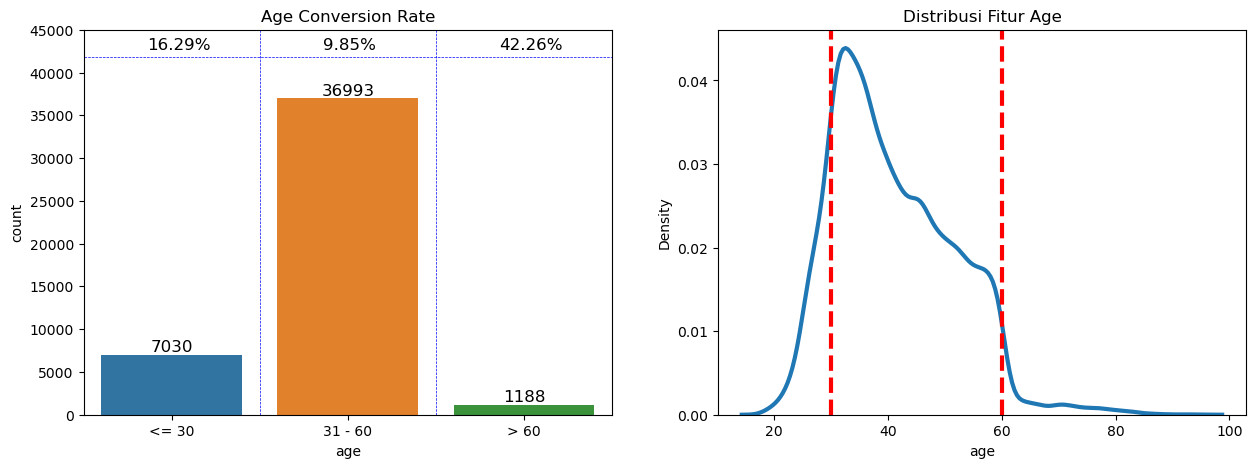

In [471]:
percentage_age = [f"{(df[(df['age'] <= 30) & (df['y'] == 'yes')]['age'].count() / ((df[(df['age'] <= 30) & (df['y'] == 'yes')]['age'].count()) + (df[(df['age'] <= 30) & (df['y'] == 'no')]['age'].count())) * 100) : .2f}%".strip(),\
                    f"{(df[(df['age'] > 30) & (df['age'] <= 60) & (df['y'] == 'yes')]['age'].count() / ((df[(df['age'] > 30) & (df['age'] <= 60) & (df['y'] == 'yes')]['age'].count()) +(df[(df['age'] > 30) & (df['age'] <= 60) & (df['y'] == 'no')]['age'].count())) * 100) : .2f}%".strip(),\
                    f"{(df[(df['age'] > 60) & (df['y'] == 'yes')]['age'].count() / ((df[(df['age'] > 60) & (df['y'] == 'yes')]['age'].count()) + (df[(df['age'] > 60) & (df['y'] == 'no')]['age'].count())) * 100) : .2f}%".strip()]
df_age = pd.DataFrame([['<= 30', df[df['age'] <= 30]['age'].count()], 
                        ['31 - 60', df[(df['age'] > 30) & (df['age'] <= 60)]['age'].count()], 
                        ['> 60', df[df['age'] > 60]['age'].count()]], 
                        columns = ['age', 'count'])
fig = plt.figure(figsize = (15, 5))
ax = sns.barplot(x = df_age['age'], y = df_age['count'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title('Age Conversion Rate')
ax.set_ylim(top = 45000)
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df_age['age'].unique())):
    ax.text(loc[0][i] + 0.26, ax.get_ylim()[1] - 2300, percentage_age[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3200, color = 'blue', ls = '--', lw = 0.5)
# plt.savefig('img/Customer Conversion Rate.png', bbox_inches='tight')
#plt.show()

sns.kdeplot(x = df['age'], ax = fig.add_subplot(1, 2, 2), lw = 3)
plt.axvline(x = 30, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 60, color = 'red', ls = '--', lw = 3)
plt.title('Distribusi Fitur Age')

Text(0.5, 1.0, 'Dibtribusi Fitur Balance\n(-2000 < x < 8000)')

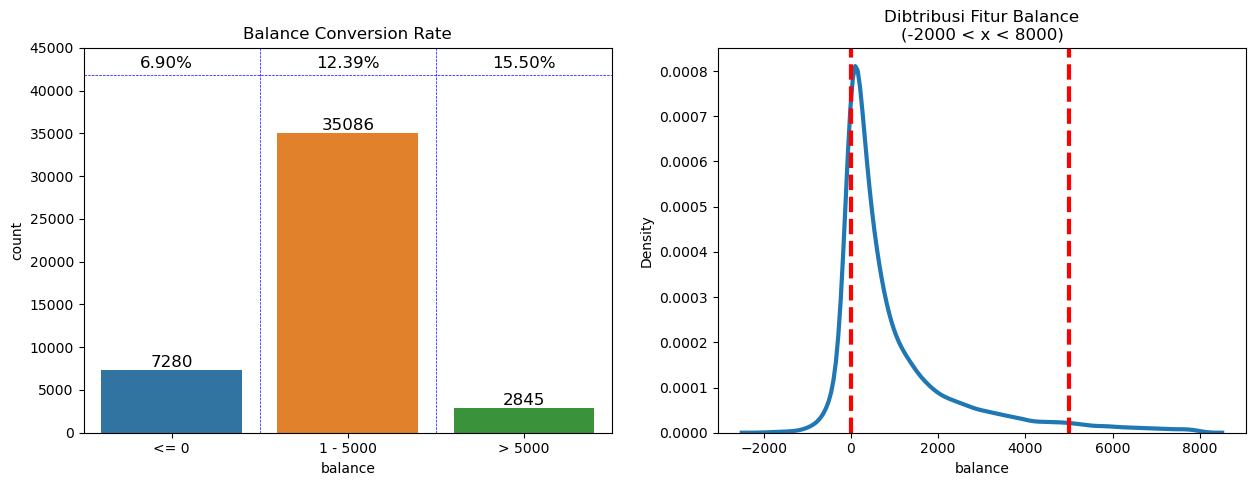

In [473]:
percentage_balance = [f"{(df[(df['balance'] <= 0) & (df['y'] == 'yes')]['balance'].count() / ((df[(df['balance'] <= 0) & (df['y'] == 'yes')]['balance'].count()) + (df[(df['balance'] <= 0) & (df['y'] == 'no')]['balance'].count())) * 100) : .2f}%".strip(),\
                        f"{(df[(df['balance'] > 0) & (df['balance'] <= 5000) & (df['y'] == 'yes')]['balance'].count() / ((df[(df['balance'] > 0) & (df['balance'] <= 5000) & (df['y'] == 'yes')]['balance'].count()) +(df[(df['balance'] > 0) & (df['balance'] <= 5000) & (df['y'] == 'no')]['balance'].count())) * 100) : .2f}%".strip(),\
                        f"{(df[(df['balance'] > 5000) & (df['y'] == 'yes')]['balance'].count() / ((df[(df['balance'] > 5000) & (df['y'] == 'yes')]['balance'].count()) + (df[(df['balance'] > 5000) & (df['y'] == 'no')]['balance'].count())) * 100) : .2f}%".strip()]
df_balance = pd.DataFrame([['<= 0', df[df['balance'] <= 0]['balance'].count()], 
                        ['1 - 5000', df[(df['balance'] > 0) & (df['balance'] <= 5000)]['balance'].count()], 
                        ['> 5000', df[df['balance'] > 5000]['balance'].count()]], 
                        columns = ['balance', 'count'])
fig = plt.figure(figsize = (15, 5))
ax = sns.barplot(x = df_balance['balance'], y = df_balance['count'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title('Balance Conversion Rate')
ax.set_ylim(top = 45000)
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df_balance['balance'].unique())):
    ax.text(loc[0][i] + 0.22, ax.get_ylim()[1] - 2350, percentage_balance[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3200, color = 'blue', ls = '--', lw = 0.5)
# plt.savefig('img/Customer Conversion Rate.png', bbox_inches='tight')
#plt.show()

sns.kdeplot(x = df[(df['balance'] > -2000) & (df['balance'] < 8000)]['balance'], ax = fig.add_subplot(1, 2, 2), lw = 3)
plt.axvline(x = 0, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 5000, color = 'red', ls = '--', lw = 3)
plt.title('Dibtribusi Fitur Balance\n(-2000 < x < 8000)')

Text(0.5, 0, 'duration (minute)')

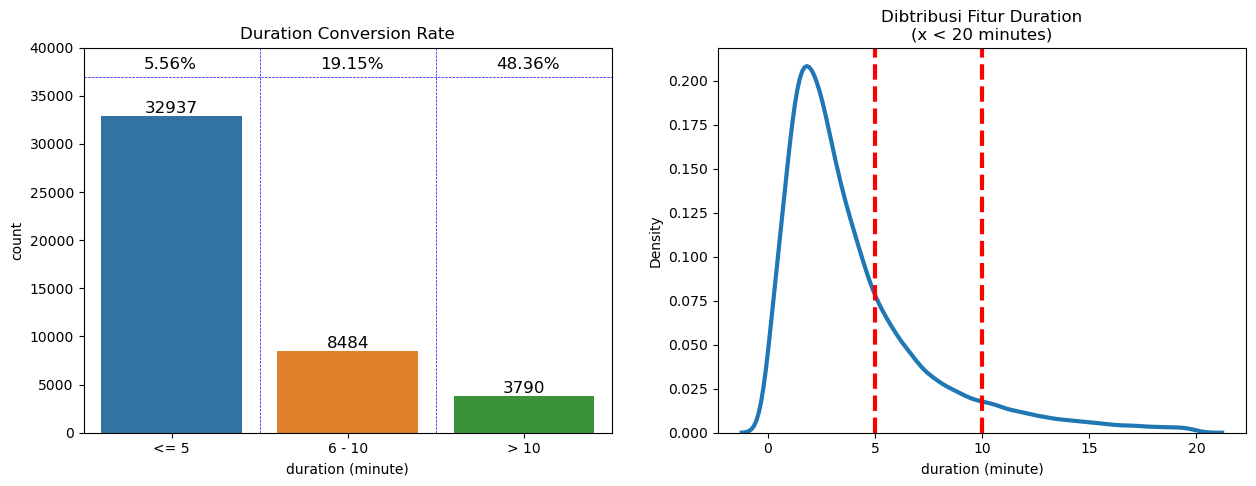

In [476]:
percentage_duration = [f"{(df[(df['duration']/60 <= 5) & (df['y'] == 'yes')]['duration'].count() / ((df[(df['duration']/60 <= 5) & (df['y'] == 'yes')]['duration'].count()) + (df[(df['duration']/60 <= 5) & (df['y'] == 'no')]['duration'].count())) * 100) : .2f}%".strip(),\
                        f"{(df[(df['duration']/60 > 5) & (df['duration']/60 <= 10) & (df['y'] == 'yes')]['duration'].count() / ((df[(df['duration']/60 > 5) & (df['duration']/60 <= 10) & (df['y'] == 'yes')]['duration'].count()) +(df[(df['duration']/60 > 5) & (df['duration']/60 <= 10) & (df['y'] == 'no')]['duration'].count())) * 100) : .2f}%".strip(),\
                        f"{(df[(df['duration']/60 > 10) & (df['y'] == 'yes')]['duration'].count() / ((df[(df['duration']/60 > 10) & (df['y'] == 'yes')]['duration'].count()) + (df[(df['duration']/60 > 10) & (df['y'] == 'no')]['duration'].count())) * 100) : .2f}%".strip()]
df_duration = pd.DataFrame([['<= 5', df[df['duration']/60 <= 5]['duration'].count()], 
                        ['6 - 10', df[(df['duration']/60 > 5) & (df['duration']/60 <= 10)]['duration'].count()], 
                        ['> 10', df[df['duration']/60 > 10]['duration'].count()]], 
                        columns = ['duration', 'count'])
fig = plt.figure(figsize = (15, 5))
ax = sns.barplot(x = df_duration['duration'], y = df_duration['count'], ax = fig.add_subplot(1, 2, 1))
ax.bar_label(ax.containers[0], fontsize = 12)
plt.xlabel(xlabel = 'duration (minute)')
plt.title('Duration Conversion Rate')
ax.set_ylim(top = 40000)
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df_duration['duration'].unique())):
    ax.text(loc[0][i] + 0.24, ax.get_ylim()[1] - 2200, percentage_duration[i], fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)
# plt.savefig('img/Customer Conversion Rate.png', bbox_inches='tight')
#plt.show()

sns.kdeplot(x = df[df['duration']/60 < 20]['duration']/60, ax = fig.add_subplot(1, 2, 2), lw = 3)
plt.axvline(x = 5, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 10, color = 'red', ls = '--', lw = 3)
plt.title('Dibtribusi Fitur Duration\n(x < 20 minutes)')
plt.xlabel(xlabel = 'duration (minute)')

Berdasarkan pengolahan data ditemukan beberapa fenomena yang dapat memberikan pengetahuan untuk tindak lanjut pada tahap berikutnya yaitu:
1. Status single memiliki nilai conversion rate yang paling tinggi, asumumsi yang kami gunakan adalah nasabah pada segment tersebut masih belum memiliki tanggungan anggota keluarga sehingga pengeluaran dapat dimanfaatkan untuk membeli produk deposito
2. Jenis pekerjaan student dan retired memiliki nilai conversion rate yang paling tinggi diantara pekerjaan lain namun hanya sebagian kecil customer yang menerima campaign, sebaliknya pekerjaan management dan blue-collar menerima campaign pailng banyak tetapi nilai conversion rate cenderung rendah
3. Tertiary education memiliki conversion rate paling tinggi disertai argumen berupa nasabah dengan tingkat pendidikan perguruan tinggi telah memahami akan benefit yang dapat diperoleh dari produk deposito
4. Nasabah dengan umur diatas 60 tahun memiliki nilai conversion rate yang sangat tinggi sebesar 42.2% namun hanya sekitar 2.62% dari nasabah yang menerima campaign
5. Durasi telephone diatas 10 menit memiliki nilai conversion rate yang sangat tinggi di angka 48.3%
<br><br>-- Multivariate Analysis --
6. Hubungan antara fitur campaign dan kelas/target menunjukkan bahwa customer yang menerima contact dalam campaign lebih dari 20 kali cenderung tidak subscribe sehingga perlu ditentukan threshold yang tepat sehingga campaign lebih optimal
7. Korelasi antara masing-masing fitur numerik pada pairplot tidak menunjukkan adanya pola atau pemisahan cluster yang nyata
8. Fitur poutcome dengan kategori success lebih banyak ditemukan pada kelompok yes dalam target y sekitar 64% dibanding kelompok no yang menunjukkan bahwa customer yang sebelumnya telah subscribed pada campaign sebelumnya mayoritas tetap subscribed pada campaign saat ini
9. Pekerjaan management merupakan pekerjaan terbesar untuk customer yang subscribed terhadap campaign yang dilakukan saat ini, selain itu terdapat married pada marital status, secondary education, customer tanpa housing loan/KPR, dan customer tanpa kredit individual
10. Sepertinya terdapat beberapa fitur categorical yang imbalance diantaranya fitur default sebesar 98.2% untuk no, loan sebesar 83.98% untuk no dan poutcome sebesar 81.75% untuk unknown

Beberapa rekomendasi yang dapat kami sampaikan sebagai bahan pertimbangan untuk tim marketing/business development diantaranya:
1. Perlu dirumuskan konsep product-market fit terhadap segment pekerjaan dan umur nasabah sehingga produk yang ditawarkan melalui campaign sesuai dengan target marketing
2. Kami merekomendasikan untuk tetap memberikan penawaran pada nasabah yang sebelumnya pernah berlangganan produk deposito karena memiliki potensi yang besar untuk tetap berlangganan atau mengaktifkan kembali produk deposito sebelumnya
3. Kami merekomendasikan untuk mendiskusikan dengan tim berkenaan dengan strategi telephone kepada nasabah sehingga diperoleh durasi waktu yang lebih panjang untuk meningkatkan potensi konversi nasabah

In [537]:
df[df['pdays'] == -1]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45203   cellular   17   nov       266         1     -1         0  unknown  yes  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  

[36954 rows x 17 columns]

Text(0.5, 1.0, 'Distribusi Fitur Campaign\n(x < 10)')

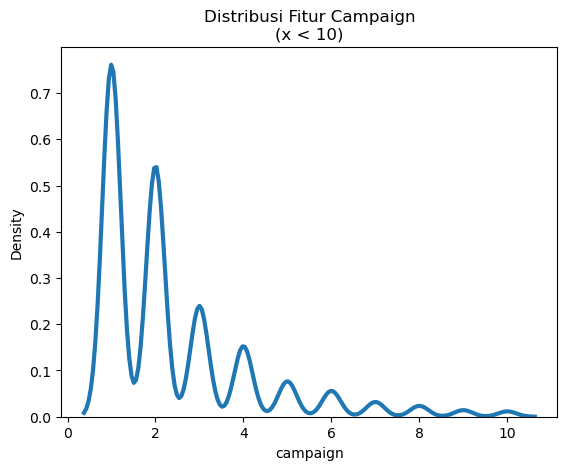

In [539]:
sns.kdeplot(df[df['campaign'] <= 10]['campaign'], lw = 3)
plt.title('Distribusi Fitur Campaign\n(x < 10)')

## Data Preparation

Mempersiapkan dan memastikan bahwa data yang digunakan untuk analisis adalah data yang berkualitas dan dapat digunakan untuk modelling

In [13]:
print(nums)
print(cats)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Fitur target dalam dataset ini ialah kolom `y` , dikarenakan kolom `y` itu tipe datanya string/object, maka kami mengganti tipe data kolom `y` menjadi integer/numerik

In [14]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

Mengganti nilai minus pada kolom balance menjadi 0, dikarenakan agak kurang make sense jika angka saldo balance nya minus

In [16]:
df['balance'] = df['balance'].apply(lambda x: max(0, x))

In [17]:
df.sample(5)

age          job  marital  education default  balance housing loan  \
5595    44       admin.  married  secondary      no        0     yes   no   
32907   50  blue-collar  married    unknown      no     1389     yes   no   
24625   47   management  married  secondary      no        0     yes  yes   
42048   60  blue-collar  married    primary      no        5      no   no   
8124    56      retired  married  secondary      no        0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  y  
5595    unknown   23   may        82         2     -1         0  unknown  0  
32907  cellular   17   apr       300         3    302         3  failure  0  
24625  cellular   17   nov       124         2     -1         0  unknown  0  
42048  cellular   29   oct       401         1     -1         0  unknown  1  
8124    unknown    2   jun        45         1     -1         0  unknown  0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


### Missing Values

In [19]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak perlu handling missing values, dikarenakan tidak ada kolom yang null

### Duplicate Values

In [20]:
df.duplicated().any()

False

Tidak terdapat kolom dengan value duplikat, sehingga tidak perlu dilakukan handling duplicate values

### Penanganan Outliers 

Kami mempertimbangkan untuk  penanganan outliers menggunakan Z-score untuk menentukan seberapa jauh suatu data berada dari rata-rata, dengan Z-score tinggi dianggap sebagai outlier atau nilai ekstrem , kami mempertimbangkan dengan memilih z-score dikarenakan kami tidak ingin kehilangan banyak data. Dan standardisasi transformasi untuk mengubah distribusi positively skewed menjadi distribusi data yang mendekati normal dengan menjadikan data  memiliki rata-rata nol dan simpangan baku satu, sehingga membantu dalam menyejajarkan data.

### Z-Score

In [21]:
from scipy import stats

In [22]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    zscore =  abs(stats.zscore(df[col])) # hitung absoluet z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier : {len(df)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier : 40209


Setelah dilakukan filter outlier dengan z-score maka baris yang digunakan untuk model yakni 40209, dengan jumlah 5002 baris yang hilang/tidak kami gunakan.

### Standardization Transformation

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
df['age_std'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance_std'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['campaign_std'] = StandardScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['pdays_std'] = StandardScaler().fit_transform(df['pdays'].values.reshape(len(df),1))
df['previous_std'] = StandardScaler().fit_transform(df['previous'].values.reshape(len(df),1))

In [25]:
df[['age_std','balance_std', 'campaign_std', 'pdays_std', 'previous_std', 'day']].describe()

age_std   balance_std  campaign_std     pdays_std  previous_std  \
count  4.020900e+04  4.020900e+04  4.020900e+04  40209.000000  4.020900e+04   
mean   3.392877e-17 -2.827398e-18  9.613152e-17      0.000000  6.785755e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00      1.000012  1.000012e+00   
min   -2.246445e+00 -6.533122e-01 -7.504395e-01     -0.364878 -3.336551e-01   
25%   -7.593505e-01 -6.144722e-01 -7.504395e-01     -0.364878 -3.336551e-01   
50%   -1.645128e-01 -4.002637e-01 -2.379750e-01     -0.364878 -3.336551e-01   
75%    7.277439e-01  1.381999e-01  2.744895e-01     -0.364878 -3.336551e-01   
max    3.107095e+00  5.507536e+00  4.886670e+00      4.386949  6.289631e+00   

                day  
count  40209.000000  
mean      15.819742  
std        8.363710  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       21.000000  
max       31.000000

Rata-rata pada setiap kolom sudah sangat mendekati nol (tetapi bukan benar-benar nol) dan standar deviasi sudah mendekati satu. Kecuali pada kolom `day` dikarenakan distribusi sudah berdistribusi normal dan simetris

### Feature Encoding

Fitur-fitur kategorikal perlu di-encode menjadi representasi numerik agar dapat digunakan dalam model. dengan label encoding pada kolom `marital`, `education`, `default`, `housing`, `loan` dan `month` dan one hot encoding untuk kolom `job`, dan `contact`.

In [26]:
mapping_marital = {
    'single': 0,
    'married': 1,
    'divorced': 2
}
df['marital'] = df['marital'].map(mapping_marital)

mapping_education = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}
df['education'] = df['education'].map(mapping_education)

mapping_default = {
    'no': 0,
    'yes': 1
}
df['default'] = df['default'].map(mapping_default)

mapping_housing = {
    'no': 0,
    'yes': 1
}
df['housing'] = df['housing'].map(mapping_housing)

mapping_loan = {
    'no': 0,
    'yes': 1
}
df['loan'] = df['loan'].map(mapping_loan)

mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df['month'] = df['month'].map(mapping_month)


In [27]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management        1          3        0     2143        1     0   
1   44    technician        0          2        0       29        1     0   
2   33  entrepreneur        1          2        0        2        1     1   
3   47   blue-collar        1          0        0     1506        1     0   
4   33       unknown        0          0        0        1        0     0   

   contact  day  ...  campaign  pdays  previous  poutcome  y   age_std  \
0  unknown    5  ...         1     -1         0   unknown  0  1.719140   
1  unknown    5  ...         1     -1         0   unknown  0  0.331185   
2  unknown    5  ...         1     -1         0   unknown  0 -0.759351   
3  unknown    5  ...         1     -1         0   unknown  0  0.628604   
4  unknown    5  ...         1     -1         0   unknown  0 -0.759351   

   balance_std  campaign_std  pdays_std  previous_std  
0     0.607811      -0.75044  -0.364878     -0.333655  
1    -0.636246      -0.75044  -0.364878     -0.333655  
2    -0.652135      -0.75044  -0.364878     -0.333655  
3     0.232946      -0.75044  -0.364878     -0.333655  
4    -0.652724      -0.75044  -0.364878     -0.333655  

[5 rows x 22 columns]

In [28]:
for cat in ['job', 'contact']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots, rsuffix='_' + cat)
df

age           job  marital  education  default  balance  housing  loan  \
0       58    management        1          3        0     2143        1     0   
1       44    technician        0          2        0       29        1     0   
2       33  entrepreneur        1          2        0        2        1     1   
3       47   blue-collar        1          0        0     1506        1     0   
4       33       unknown        0          0        0        1        0     0   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45203   23       student        0          3        0      113        0     0   
45205   25    technician        0          2        0      505        0     1   
45206   51    technician        1          3        0      825        0     0   
45207   71       retired        2          1        0     1729        0     0   
45209   57   blue-collar        1          2        0      668        0     0   

         contact  day  ...  job_retired  job_self-employed  job_services  \
0        unknown    5  ...            0                  0             0   
1        unknown    5  ...            0                  0             0   
2        unknown    5  ...            0                  0             0   
3        unknown    5  ...            0                  0             0   
4        unknown    5  ...            0                  0             0   
...          ...  ...  ...          ...                ...           ...   
45203   cellular   17  ...            0                  0             0   
45205   cellular   17  ...            0                  0             0   
45206   cellular   17  ...            0                  0             0   
45207   cellular   17  ...            1                  0             0   
45209  telephone   17  ...            0                  0             0   

       job_student  job_technician job_unemployed  job_unknown  \
0                0               0              0            0   
1                0               1              0            0   
2                0               0              0            0   
3                0               0              0            0   
4                0               0              0            1   
...            ...             ...            ...          ...   
45203            1               0              0            0   
45205            0               1              0            0   
45206            0               1              0            0   
45207            0               0              0            0   
45209            0               0              0            0   

       contact_cellular  contact_telephone  contact_unknown  
0                     0                  0                1  
1                     0                  0                1  
2                     0                  0                1  
3                     0                  0                1  
4                     0                  0                1  
...                 ...                ...              ...  
45203                 1                  0                0  
45205                 1                  0                0  
45206                 1                  0                0  
45207                 1                  0                0  
45209                 0                  1                0  

[40209 rows x 37 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40209 non-null  int64  
 1   job                40209 non-null  object 
 2   marital            40209 non-null  int64  
 3   education          40209 non-null  int64  
 4   default            40209 non-null  int64  
 5   balance            40209 non-null  int64  
 6   housing            40209 non-null  int64  
 7   loan               40209 non-null  int64  
 8   contact            40209 non-null  object 
 9   day                40209 non-null  int64  
 10  month              40209 non-null  int64  
 11  duration           40209 non-null  int64  
 12  campaign           40209 non-null  int64  
 13  pdays              40209 non-null  int64  
 14  previous           40209 non-null  int64  
 15  poutcome           40209 non-null  object 
 16  y                  402

In [30]:
# drop kolom kategori yang asli (karena sudah di-encoding dan di standardisasi) 
# drop kolom duration dan karena value kolom duration ada setelah model
# drop kolom poutcome karena mayoritas ada di value unknown
df_new = df.drop(columns=['job', 'contact', 'poutcome', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']).copy()

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marital            40209 non-null  int64  
 1   education          40209 non-null  int64  
 2   default            40209 non-null  int64  
 3   housing            40209 non-null  int64  
 4   loan               40209 non-null  int64  
 5   day                40209 non-null  int64  
 6   month              40209 non-null  int64  
 7   y                  40209 non-null  int64  
 8   age_std            40209 non-null  float64
 9   balance_std        40209 non-null  float64
 10  campaign_std       40209 non-null  float64
 11  pdays_std          40209 non-null  float64
 12  previous_std       40209 non-null  float64
 13  job_admin.         40209 non-null  uint8  
 14  job_blue-collar    40209 non-null  uint8  
 15  job_entrepreneur   40209 non-null  uint8  
 16  job_housemaid      402

### Feature Selection

<Axes: >

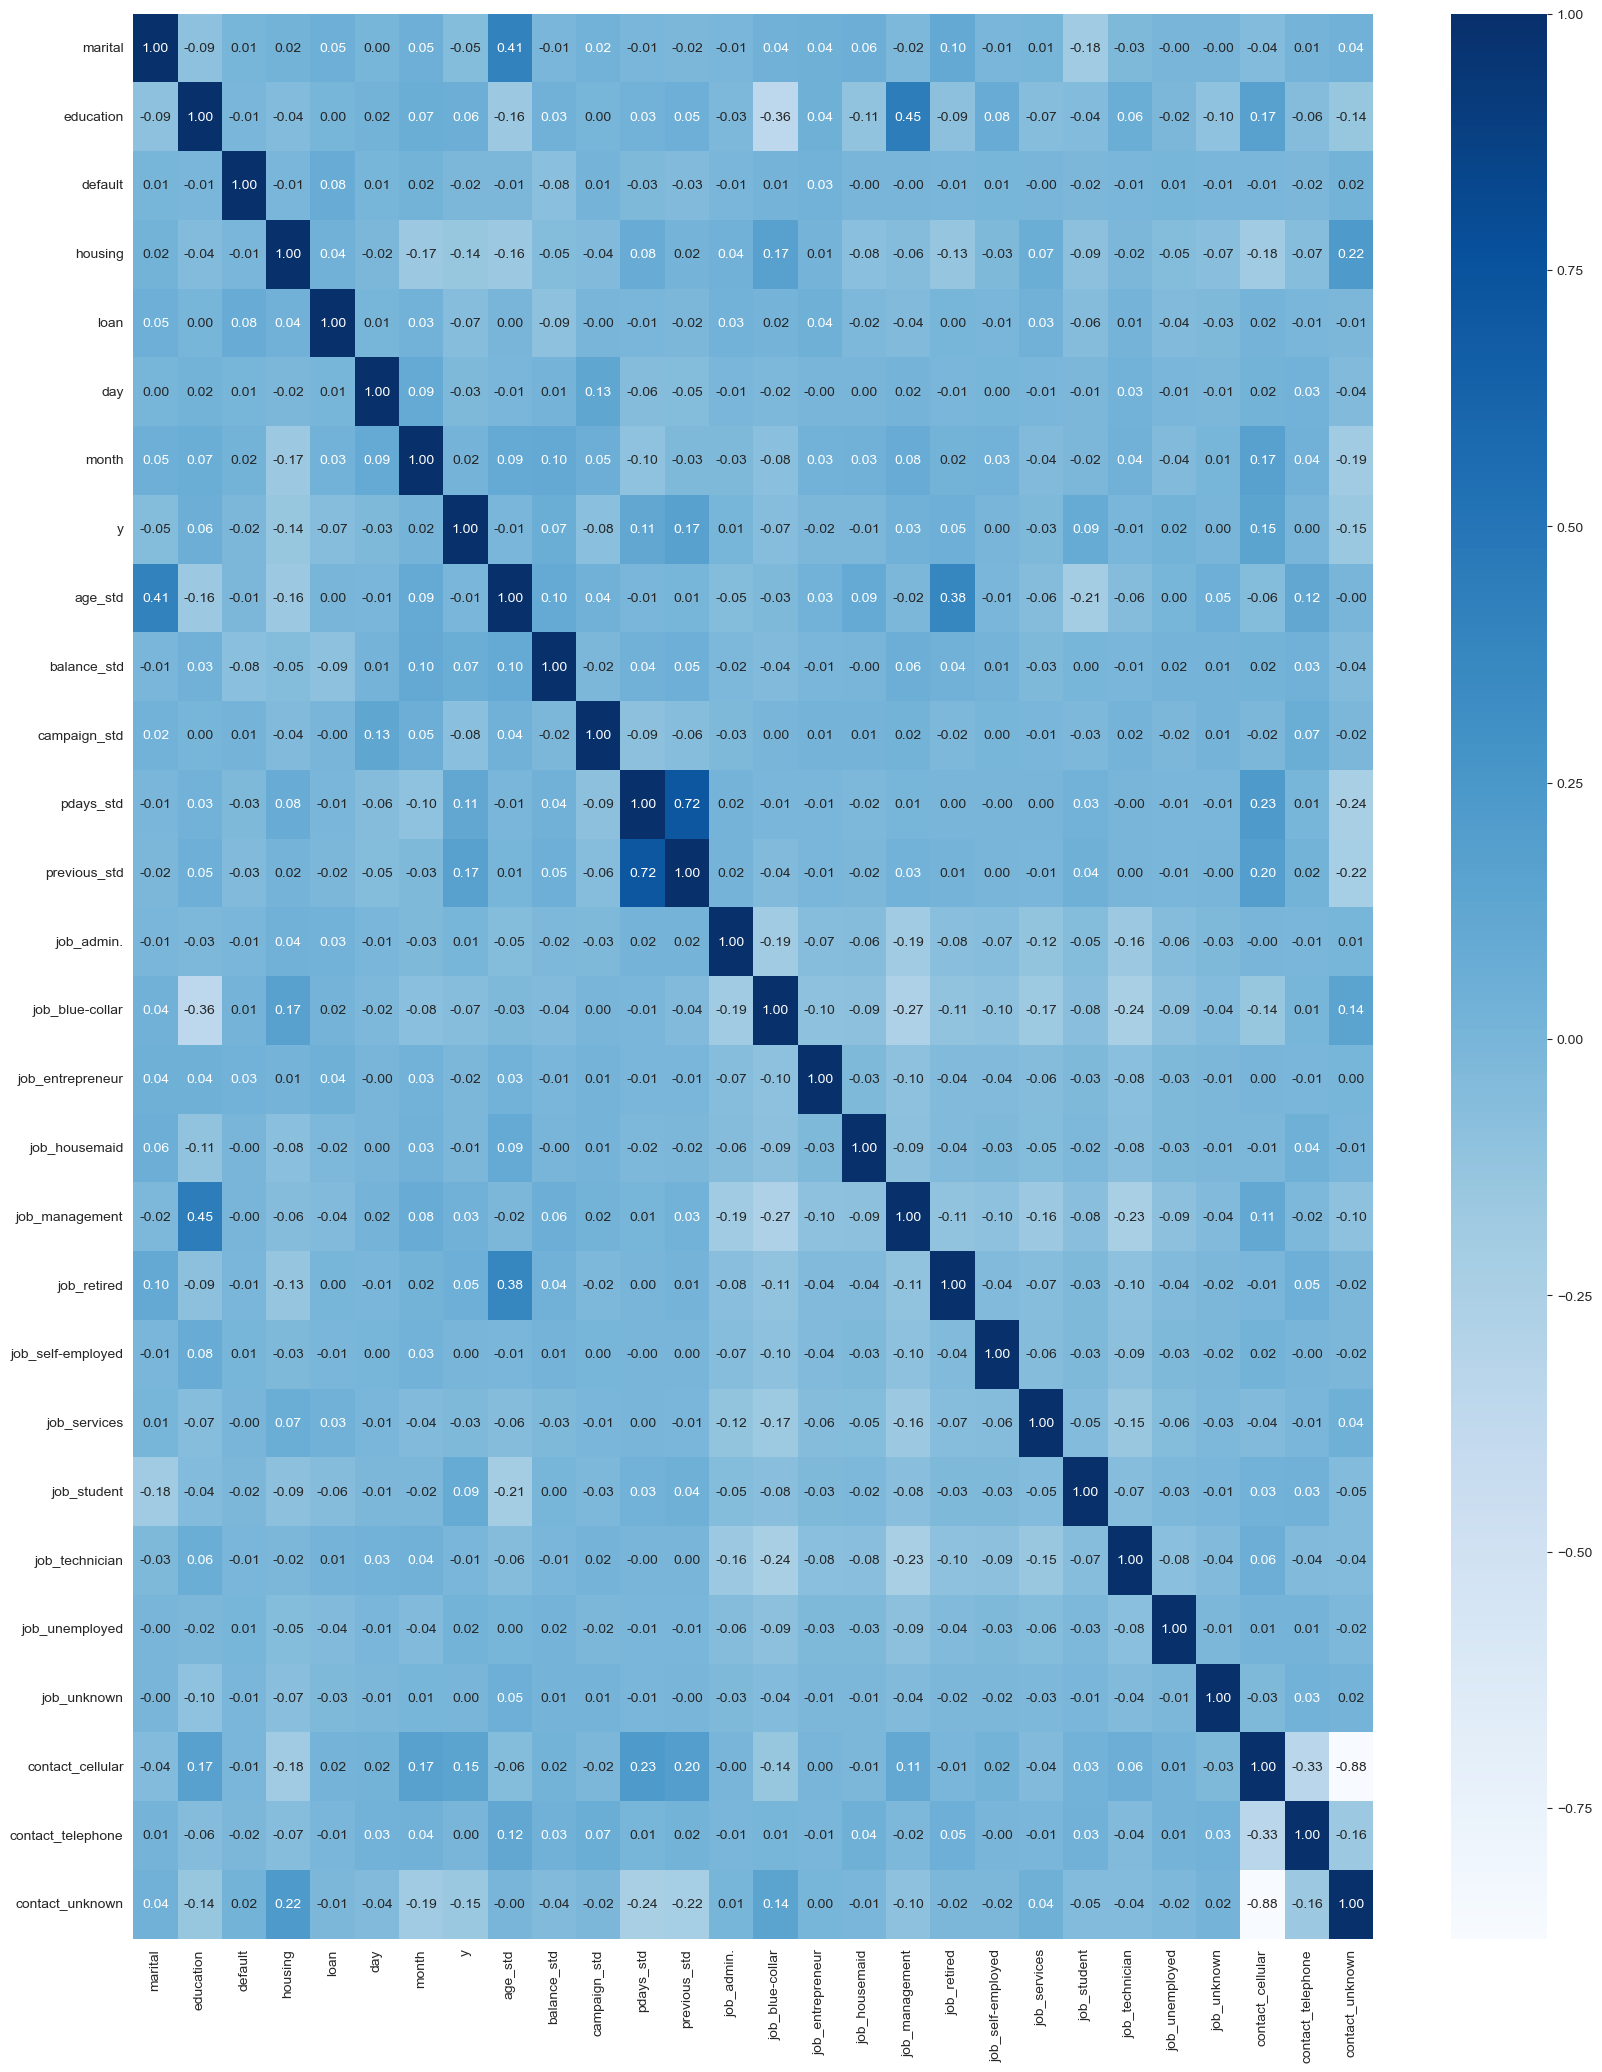

In [32]:
plt.figure(figsize=(20, 25))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari heatmap diatas dapat dilihat bahwa :
- Fitur previous_std : memiliki korelasi positif yang paling tinggi dibandingkan fitur-fitur lainnya akan tetapi korelasi ini korelasi yang cukup lemah yakni sebesar 0.17. Hal ini menunjukkan bahwa kontak yang pernah dilakukan sebelumnya (campaign ini) memiliki korelasi positif dengan fitur target 'y',dengan asumsi bahwa orang yang telah dihubungi sebelumnya cenderung untuk merespons positif terhadao campaign yang diberikan
- Fitur contact_cellular: memiliki korelasi positif yang tinggi dibandingkan fitur-fitur lainnya namun masih dibawah fitur previous_std akan tetapi korelasi ini korelasi yang cukup lemah yakni sebesar 0.15. Hal ini menunjukkan bahwa metode kontak melalui ponsel seluler memiliki korelasi positif dengan fitur target "y", dengan asumsi bahwa orang yang dihubungi melalui ponsel seluler cenderung untuk merespons positif terhadap campaign yang diberikan.
- Fitur housing : memiliki korelasi negatif yang tinggi  dibanding fitur-fitur lainnya yakni sebesar -0.14. Hal ini menunjukkan bahwa orang yang memiliki kredit rumah memiliki korelasi negatif dengan fitur target 'y', dengan asumsi bahwa orang yang tidak memiliki tanggungan (kredit rumah) cenderung untuk merespons positif terhadap campaign yang diberikan.